In [ ]:
# Install library piml
!pip install piml

# Import Libraries

In [2]:
#Untuk Explore dan Preprocessing Data
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import external
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

#Untuk Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import joblib

#Untuk Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Untuk Evaluasi Model
from sklearn.metrics import classification_report, roc_auc_score, f1_score, confusion_matrix, RocCurveDisplay

#Untuk Interpretasi Model
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

# Data Exploration

In [ ]:
# Import dataset
url = 'https://raw.githubusercontent.com/triantonugroho/Thesis/refs/heads/main/Dataset/7000.csv'
df = pd.read_csv(url)

In [ ]:
# Eksplorasi Data

# Menampilkan 5 data pertama
df.head()

,member_name,email,gender,location,employer,relationship,patient_name,patient_suffix,patient_dob,cause,Fee Charged,membership_period,number_of_claims,number_of_dependants,label
0,Chipi,ajimmison0@sun.com,female,Kwekwe,Vipe,Grandfather,Mabhena,789,9/11/1997,Other,3798,1541,2,4,0
1,Femba,rsoonhouse1@google.it,female,Marondera,Mudo,Husband,Sithole,860,1/14/1992,Other,48905,8269,4,3,0
2,Geta,bchecchetelli2@house.gov,female,Rusape,Skaboo,Mother,Chipi,374,7/3/1999,Road Traffic Accident,39963,6223,2,2,0
3,Tichaona,mgarman3@psu.edu,female,Rusape,Babbleset,Father,Jembwa,729,7/31/1978,Road Traffic Accident,34948,8832,6,3,0
4,Chisa,ccough4@biglobe.ne.jp,female,Bulawayo,Flipopia,Father,Foto,716,12/28/1992,Accident At Work,46984,8804,1,2,1


In [ ]:
# Menampilkan 5 data terakhir
df.tail()

,member_name,email,gender,location,employer,relationship,patient_name,patient_suffix,patient_dob,cause,Fee Charged,membership_period,number_of_claims,number_of_dependants,label
6995,Mirwa,gcobbern@microsoft.com,male,Kwekwe,Trudeo,Grandmother,Mabhena,595,11/30/1984,Other,25308,6478,4,3,0
6996,Chisa Chisi,ebrasierro@sakura.ne.jp,male,Gweru,Jetwire,Husband,Bima,158,8/6/1986,Accident At Home,32895,438,1,1,0
6997,Evans,ybuckyrp@slashdot.org,male,Rusape,Realpoint,Daughter,Dihwa,743,2/13/1980,Accident At Home,19082,8134,3,1,0
6998,Femba,raskawrq@washington.edu,female,Gweru,Eimbee,Brother,Peterson,472,12/28/2001,Other,31717,8293,4,3,1
6999,Sithole,wlantrr@quantcast.com,male,Gweru,Camimbo,Mother,Sibanda,625,3/21/2003,Other,29020,3686,3,4,0


In [ ]:
# Mengecek tipe data
df.dtypes

member_name             object
email                   object
gender                  object
location                object
employer                object
relationship            object
patient_name            object
patient_suffix           int64
patient_dob             object
cause                   object
Fee Charged              int64
membership_period        int64
number_of_claims         int64
number_of_dependants     int64
label                    int64
dtype: object

In [ ]:
# Mengecek informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   member_name           7000 non-null   object
 1   email                 7000 non-null   object
 2   gender                7000 non-null   object
 3   location              7000 non-null   object
 4   employer              7000 non-null   object
 5   relationship          7000 non-null   object
 6   patient_name          7000 non-null   object
 7   patient_suffix        7000 non-null   int64 
 8   patient_dob           7000 non-null   object
 9   cause                 7000 non-null   object
 10  Fee Charged           7000 non-null   int64 
 11  membership_period     7000 non-null   int64 
 12  number_of_claims      7000 non-null   int64 
 13  number_of_dependants  7000 non-null   int64 
 14  label                 7000 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 8

In [ ]:
# Memeriksa duplikasi data
df.duplicated(keep=False).sum()

0

In [14]:
# Memeriksa keberadaan missing value
df.isna().sum()

member_name             0
email                   0
gender                  0
location                0
employer                0
relationship            0
patient_name            0
patient_suffix          0
patient_dob             0
cause                   0
Fee Charged             0
membership_period       0
number_of_claims        0
number_of_dependants    0
label                   0
dtype: int64

In [15]:
# Menghitung nilai unik dari setiap kolom
df.nunique()

member_name               24
email                   7000
gender                     2
location                  12
employer                 383
relationship              13
patient_name              24
patient_suffix           899
patient_dob             5662
cause                      4
Fee Charged             6544
membership_period       4847
number_of_claims           6
number_of_dependants       4
label                      2
dtype: int64

In [16]:
# Statistika Deskriptif
df.describe()

,patient_suffix,Fee Charged,membership_period,number_of_claims,number_of_dependants,label
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,549.738857,25464.071429,4521.435143,3.448000,2.479000,0.197000
std,259.634041,14336.311377,2576.064241,1.707378,1.119704,0.397761
min,100.000000,503.000000,100.000000,1.000000,1.000000,0.000000
25%,323.000000,12864.250000,2298.750000,2.000000,1.000000,0.000000
50%,549.000000,25469.000000,4485.000000,3.000000,2.000000,0.000000
75%,777.000000,37870.750000,6752.250000,5.000000,3.000000,0.000000
max,999.000000,49998.000000,9000.000000,6.000000,4.000000,1.000000


In [ ]:

# Mengatur gaya plotting menjadi “whitegrid”
sns.set(style='whitegrid')

In [ ]:
# Menentukan fitur kategorik dan numerik
cat_features = ['member_name','email','gender','location','employer','relationship','patient_name','patient_dob','cause']

num_features = ['patient_suffix','Fee Charged','membership_period','number_of_claims','number_of_dependants','label']

In [ ]:
# Mengecek jumlah fitur kategorik dan numerik
len(cat_features), len(num_features)

(9, 6)

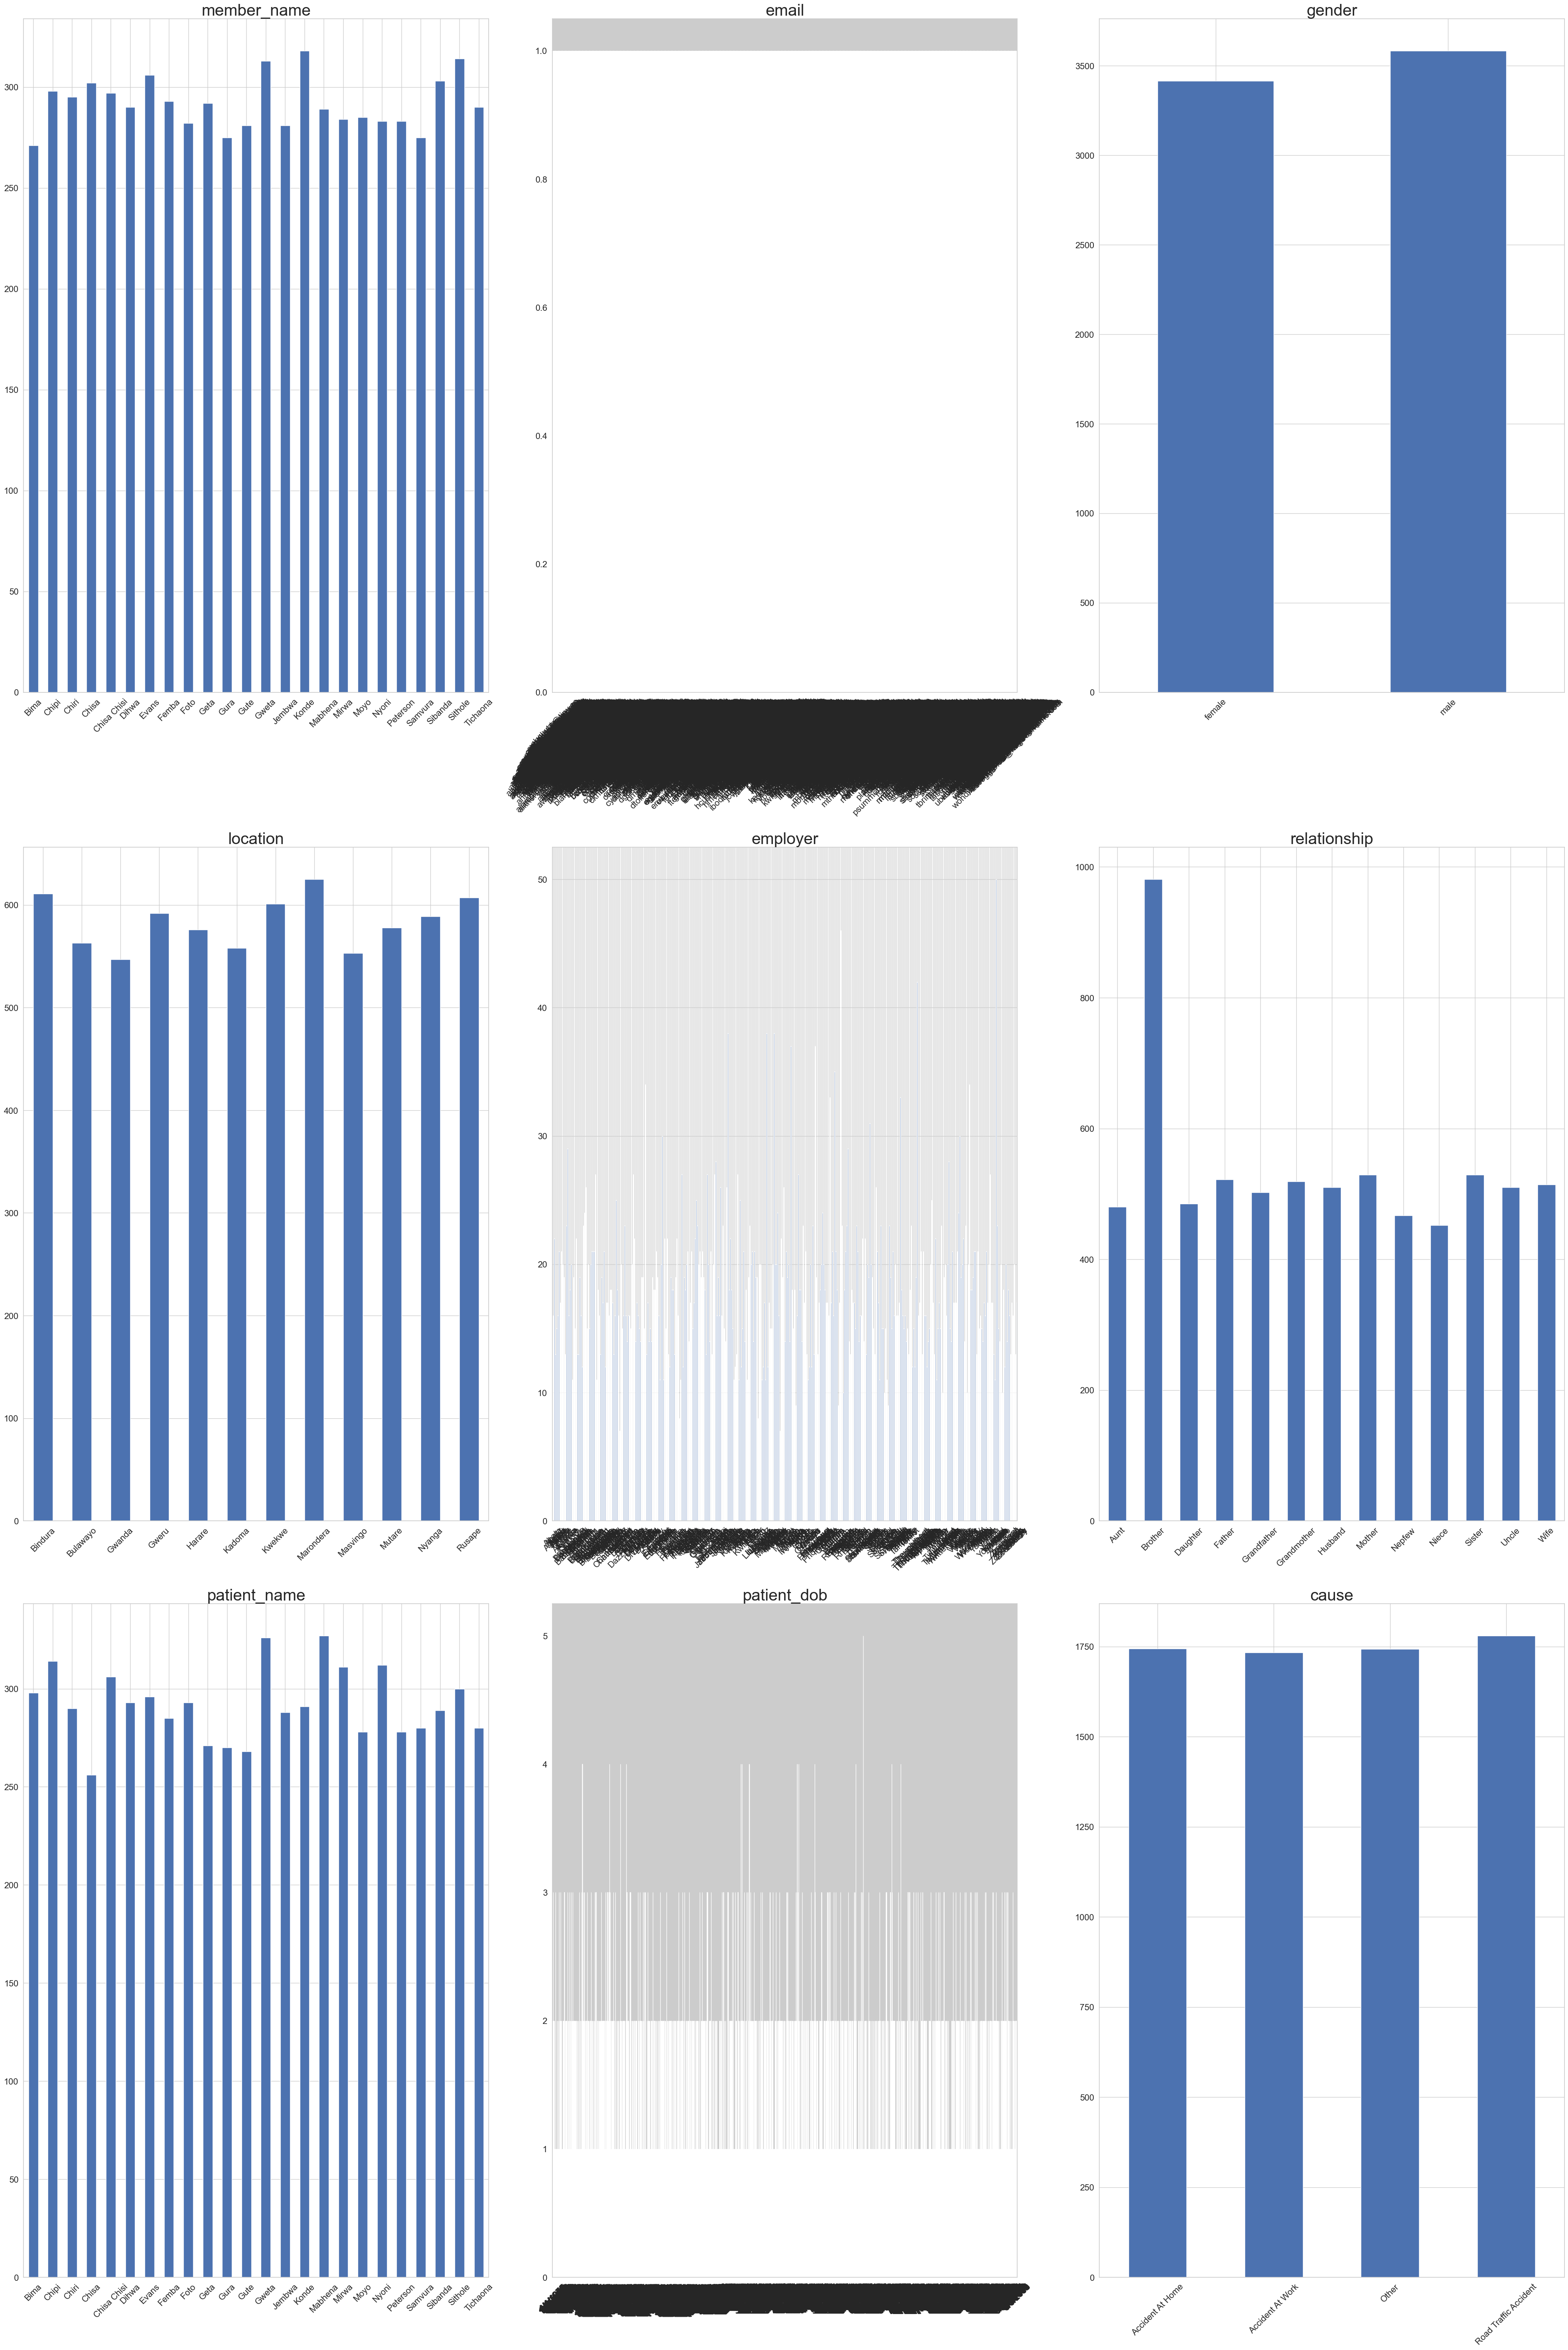

In [ ]:
# Visualisasi fitur kategorik
fig, ax = plt.subplots(3, 3, figsize=(40,60), constrained_layout=True)
for i in range(3):
    for j in range(3):
        if 3*i + j < len(cat_features):
            df[cat_features[3*i + j]].value_counts().sort_index().plot.bar(ax=ax[i, j])
            ax[i, j].tick_params('x', rotation=45)
            ax[i, j].tick_params(labelsize=16)
            ax[i, j].set_title(cat_features[3*i + j], size=30)

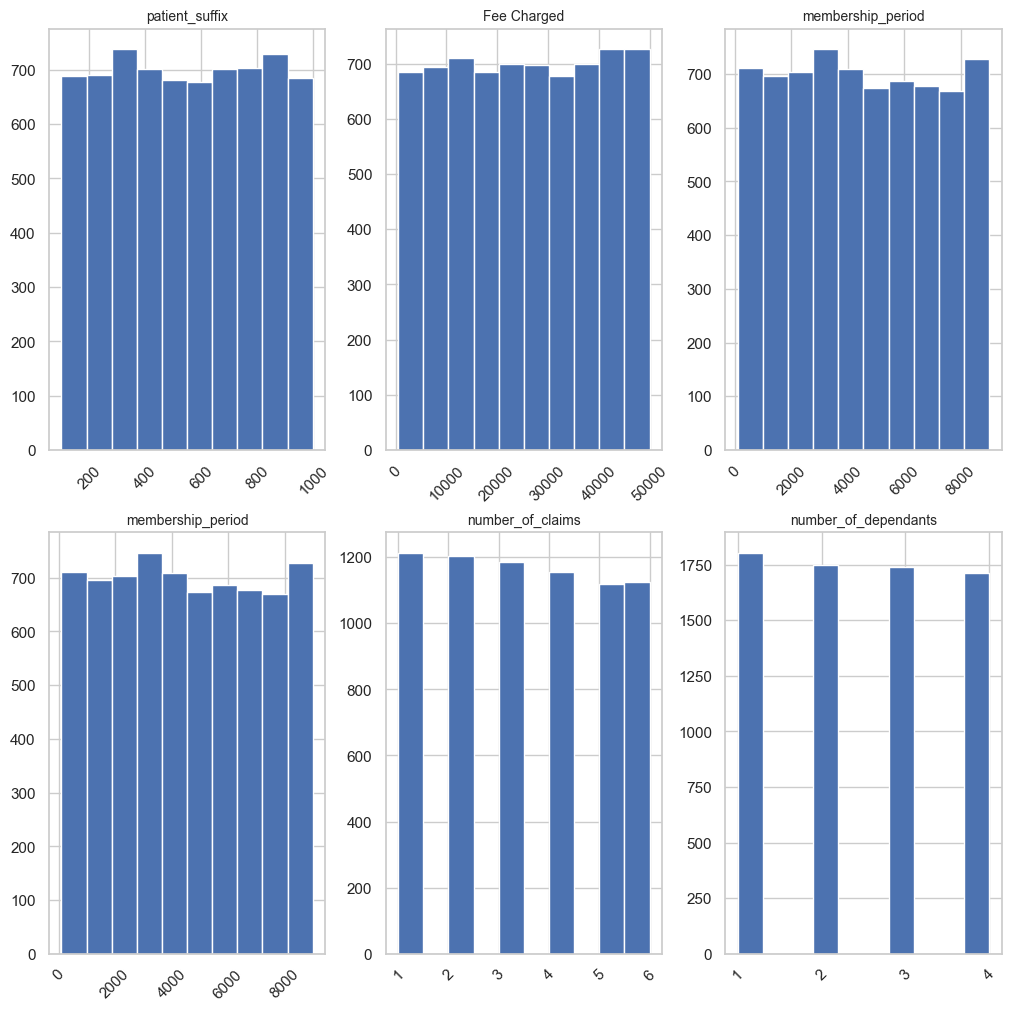

In [ ]:
# Visualisasi fitur numerik
fig, ax = plt.subplots(2, 3, figsize=(10,10), constrained_layout=True)
for i in range(2):
    for j in range(3):
        if 2*i + j < len(num_features):
            df[num_features[2*i + j]].hist(bins=10, ax=ax[i, j])
            ax[i, j].tick_params('x', rotation=45)
            ax[i, j].set_title(num_features[2*i + j],size=10)

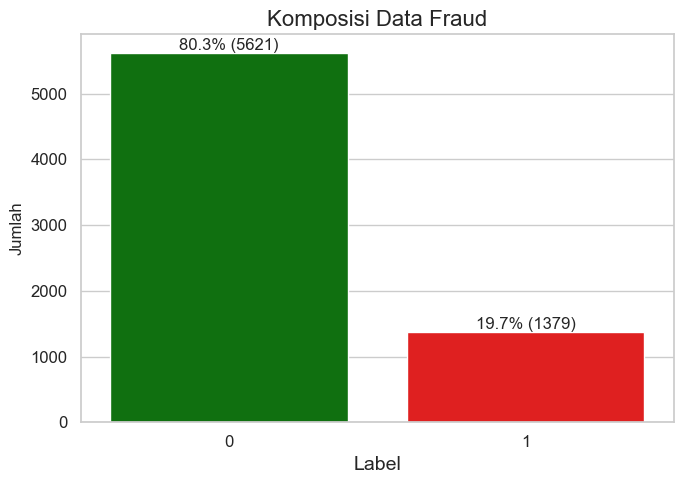

In [ ]:
# Visualisasi Komposisi Data Fraud

import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan kolom label dalam bentuk string
df['label'] = df['label'].astype(str)

plt.figure(figsize=(7, 5))

# Warna batang sesuai kelas
palette = {'0': 'green', '1': 'red'}

# Plot countplot
ax = sns.countplot(
    data=df,
    x='label',
    hue='label',
    palette=palette,
    dodge=False,
    legend=False
)

# Atur tampilan
plt.xticks(size=12)
plt.xlabel('Label', size=14)
plt.yticks(size=12)
plt.ylabel('Jumlah', size=12)
plt.title("Komposisi Data Fraud", size=16)

# Tambahkan persentase + jumlah data di atas tiap batang
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    label = f'{percentage:.1f}% ({count})'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(label, (x, y), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


# Pre-Pipeline
- Define feature & label
- Split the data
- Define categorical & numerical feature
- Define encoder and scaler for preprocessing in the pipeline

In [ ]:
# Pre-Pipeline

import pandas as pd
from datetime import datetime

# misal df sudah di-load sebelumnya
# ------------------------------------------------------------------
# 1) Konversi patient_dob → age (tahun, float) relatif ke 2021-01-01
# ------------------------------------------------------------------
# asumsikan format 'M/D/YYYY', sesuaikan format jika berbeda
df['patient_dob'] = pd.to_datetime(
    df['patient_dob'],
    format='%m/%d/%Y',
    errors='coerce'   # kalau parsing gagal, jadi NaT
)

# tanggal referensi 1 Januari 2021
ref_date = pd.to_datetime('2021-01-01')

# umur dalam tahun, termasuk desimal
df['age'] = (ref_date - df['patient_dob']).dt.days / 365.25

# ------------------------------------------------------------------
# 2) Drop kolom yang tidak perlu
# ------------------------------------------------------------------
to_drop = [
    'member_name', 'email',
    'patient_name', 'patient_suffix',
    'patient_dob', 'location',
    'employer'
]
df = df.drop(columns=to_drop)

# ------------------------------------------------------------------
# 3) Pisahkan label dari fitur
# ------------------------------------------------------------------
label = df['label']
data  = df.drop(columns=['label'])

# nama‐nama fitur siap digunakan
feature_names = data.columns

# cek hasil
print("Fitur:", feature_names)
print("Contoh data:\n", data.head())
print("Contoh label:\n", label.head())


Fitur: Index(['gender', 'relationship', 'cause', 'Fee Charged', 'membership_period',
       'number_of_claims', 'number_of_dependants', 'age'],
      dtype='object')
Contoh data:
    gender relationship                  cause  Fee Charged  membership_period  \
0  female  Grandfather                  Other         3798               1541   
1  female      Husband                  Other        48905               8269   
2  female       Mother  Road Traffic Accident        39963               6223   
3  female       Father  Road Traffic Accident        34948               8832   
4  female       Father       Accident At Work        46984               8804   

   number_of_claims  number_of_dependants        age  
0                 2                     4  23.307324  
1                 4                     3  28.966461  
2                 2                     2  21.500342  
3                 6                     3  42.422998  
4                 1                     2  28.010951  
Con

In [ ]:
# Split dataset 
x_train, x_test, y_train, y_test = train_test_split(data,label, train_size=0.8, random_state=1)

In [ ]:
# Menampilkan x_train
x_train

,gender,relationship,cause,Fee Charged,membership_period,number_of_claims,number_of_dependants,age
4815,female,Mother,Road Traffic Accident,11100,8166,3,4,45.223819
3059,male,Sister,Accident At Home,36819,5327,3,1,34.647502
985,female,Mother,Accident At Work,15495,1131,5,4,35.274470
6022,female,Uncle,Other,25645,6341,6,2,36.098563
6630,female,Wife,Road Traffic Accident,46128,7536,4,3,53.182752
...,...,...,...,...,...,...,...,...
905,female,Wife,Other,42199,6138,5,4,34.940452
5192,female,Brother,Accident At Home,42453,376,4,2,49.360712
3980,male,Sister,Accident At Home,22514,3912,2,4,13.234771
235,female,Father,Accident At Home,33672,6673,4,1,49.297741


In [ ]:
# Menampilkan y_train
y_train

4815    0
3059    0
985     0
6022    0
6630    0
       ..
905     0
5192    0
3980    0
235     1
5157    0
Name: label, Length: 5600, dtype: object

In [ ]:
# Mendefinisikan pipeline preprocessing untuk one-hot encoding dan min-max scaling

# Kategori yang tersisa
cat_col = [
    'gender',
    'relationship',
    'cause'
]

# Numerik yang tersisa (di mana `age` sudah menggantikan patient_dob)
num_col = [
    'age',
    'Fee Charged',
    'membership_period',
    'number_of_claims',
    'number_of_dependants'
]

### Transformers for numerical data
numerical_transformer = Pipeline(steps=[('Scaler', MinMaxScaler())])

### Transformers for categorical data
categorical_transformer = Pipeline(steps=[('Encoder', OneHotEncoder(handle_unknown='ignore'))])

### Combine pipelines using ColumnTransformer
preprocessing = ColumnTransformer(transformers=[('Numerical', numerical_transformer, num_col),
                                                ('Categorical', categorical_transformer, cat_col)],
                                  remainder='passthrough')

# DATA BALANCING (SMOTE)

In [22]:
import joblib

# Ganti path dengan path file .pkl hasil penyimpanan
loaded_pipeline = joblib.load("dt7_models/dt7_gridsearch_full_20250523_012901.pkl")


In [23]:
# Ambil tahap preprocessing dan SMOTE
preprocessing = loaded_pipeline.named_steps['preprocessing']
smote = loaded_pipeline.named_steps['oversampling']

# Transform x_train dan lakukan SMOTE untuk melihat distribusinya
x_train_transformed = preprocessing.fit_transform(x_train)
x_smote, y_smote = smote.fit_resample(x_train_transformed, y_train)


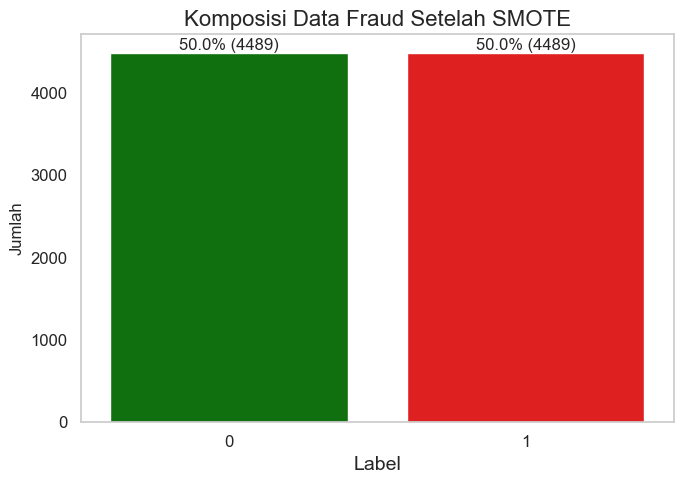

In [ ]:
# Menampilkan komposisi data fraud setelah SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Buat DataFrame untuk plotting
df_resampled = pd.DataFrame({'label': y_smote.astype(str)})

plt.figure(figsize=(7, 5))
palette = {'0': 'green', '1': 'red'}

ax = sns.countplot(
    data=df_resampled,
    x='label',
    hue='label',
    palette=palette,
    dodge=False,
    legend=False
)

plt.xticks(size=12)
plt.xlabel('Label', size=14)
plt.yticks(size=12)
plt.ylabel('Jumlah', size=12)
plt.title("Komposisi Data Fraud Setelah SMOTE", size=16)

# Tambahkan label jumlah + persentase
total = len(df_resampled)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    label = f'{percentage:.1f}% ({count})'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(label, (x, y), ha='center', va='bottom', fontsize=12)

# Hilangkan grid horizontal
ax.grid(False)

plt.tight_layout()
plt.show()

# PIPELINE
- Decision Tree
- Random Forest
- XGBoost
- Surrogate XGBoost
- XGBoost Depth 2

## DECISION TREE

### Model

In [ ]:
# Model

# Training Model Decision Tree
param_dt = {'max_depth': np.arange(5, 10),
            'min_samples_leaf': (50, 100, 150, 200, 250, 300, 350, 400, 450, 500),
            'min_samples_split': (50, 100, 150, 200, 250, 300, 350, 400, 450, 500)}

# Create pipelines with SMOTE for each model (nested GridSearchCV)
dt_grid = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), param_grid=param_dt, scoring='roc_auc', cv=5)

dt_pipeline = ImbPipeline([
    ('preprocessing', preprocessing),
    ('oversampling', SMOTE(random_state=1)),
    ('grid_search', dt_grid)
])

dt_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical',
                                                  Pipeline(steps=[('Scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'Fee Charged',
                                                   'membership_period',
                                                   'number_of_claims',
                                                   'number_of_dependants']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'relationship',
                                                   'cause'])])),
                ('oversampling', SMOTE(random_state=1)),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=DecisionTreeClassifier(criterion='entropy'),
                              param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                                          'min_samples_leaf': (50, 100, 150,
                                                               200, 250, 300,
                                                               350, 400, 450,
                                                               500),
                                          'min_samples_split': (50, 100, 150,
                                                                200, 250, 300,
                                                                350, 400, 450,
                                                                500)},
                              scoring='roc_auc'))])

**Menyimpan Model**

In [ ]:
# Menyimpan Model Decision Tree
mport joblib
import os
from datetime import datetime

def save_full_pipeline(pipeline, model_name="dt7_full_pipeline", models_dir="dt7_models"):
    """
    Simpan seluruh pipeline (preprocessing, oversampling, grid_search/model) 
    sebagai satu file .pkl yang bisa langsung di-load kembali.
    """
    os.makedirs(models_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{models_dir}/{model_name}_{timestamp}.pkl"
    joblib.dump(pipeline, filename)
    print(f"✅ Full pipeline saved to: {filename}")
    return filename

# Contoh pemakaian, setelah kamu .fit(dt_pipeline, x_train, y_train):
saved_path_dt7 = save_full_pipeline(dt_pipeline, model_name="dt7_gridsearch_full")


✅ Full pipeline saved to: dt7_models/dt7_gridsearch_full_20250523_012901.pkl


In [ ]:
# Menampilkan hyperparameter terbaik Decision Tree
import joblib

# Load seluruh pipeline
loaded_pipeline_dt7 = joblib.load(saved_path_dt7)

# Akses GridSearchCV di dalam pipeline
gs = loaded_pipeline_dt7.named_steps['grid_search']

# Ambil dan print best hyperparameters
best_params = gs.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': 9, 'min_samples_leaf': 100, 'min_samples_split': 300}


In [247]:
# Ambil hasil CV dari GridSearchCV
cv_results = loaded_pipeline_dt7.named_steps['grid_search'].cv_results_

# 3) Tampilkan sebagai DataFrame dan sortir berdasarkan rank_test_score
pd.DataFrame(cv_results).sort_values("rank_test_score", ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
415,0.059978,0.002314,0.002601,0.000806,9,100,300,"{'max_depth': 9, 'min_samples_leaf': 100, 'min...",0.521933,0.815034,0.889465,0.895628,0.890433,0.802498,0.143418,1
414,0.063028,0.002186,0.002607,0.000487,9,100,250,"{'max_depth': 9, 'min_samples_leaf': 100, 'min...",0.520784,0.814525,0.889530,0.895628,0.890712,0.802236,0.143900,2
416,0.062396,0.002574,0.003006,0.000634,9,100,350,"{'max_depth': 9, 'min_samples_leaf': 100, 'min...",0.521499,0.819657,0.883539,0.895841,0.888951,0.801897,0.142834,3
413,0.063039,0.001982,0.002607,0.000492,9,100,200,"{'max_depth': 9, 'min_samples_leaf': 100, 'min...",0.518770,0.816215,0.886197,0.896205,0.889131,0.801304,0.144204,4
412,0.062452,0.002762,0.002580,0.000472,9,100,150,"{'max_depth': 9, 'min_samples_leaf': 100, 'min...",0.518770,0.816215,0.886197,0.896205,0.889131,0.801304,0.144204,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.033194,0.002473,0.002601,0.000801,5,500,300,"{'max_depth': 5, 'min_samples_leaf': 500, 'min...",0.488921,0.694625,0.744428,0.754397,0.740067,0.684487,0.099918,491
96,0.032614,0.001915,0.002605,0.000494,5,500,350,"{'max_depth': 5, 'min_samples_leaf': 500, 'min...",0.488921,0.694625,0.744428,0.754397,0.740067,0.684487,0.099918,491
97,0.038235,0.002230,0.003364,0.001485,5,500,400,"{'max_depth': 5, 'min_samples_leaf': 500, 'min...",0.488921,0.694625,0.744428,0.754397,0.740067,0.684487,0.099918,491
98,0.035379,0.004896,0.002803,0.000396,5,500,450,"{'max_depth': 5, 'min_samples_leaf': 500, 'min...",0.488921,0.694625,0.744428,0.754397,0.740067,0.684487,0.099918,491


**Menampilkan Rules dan Tree**

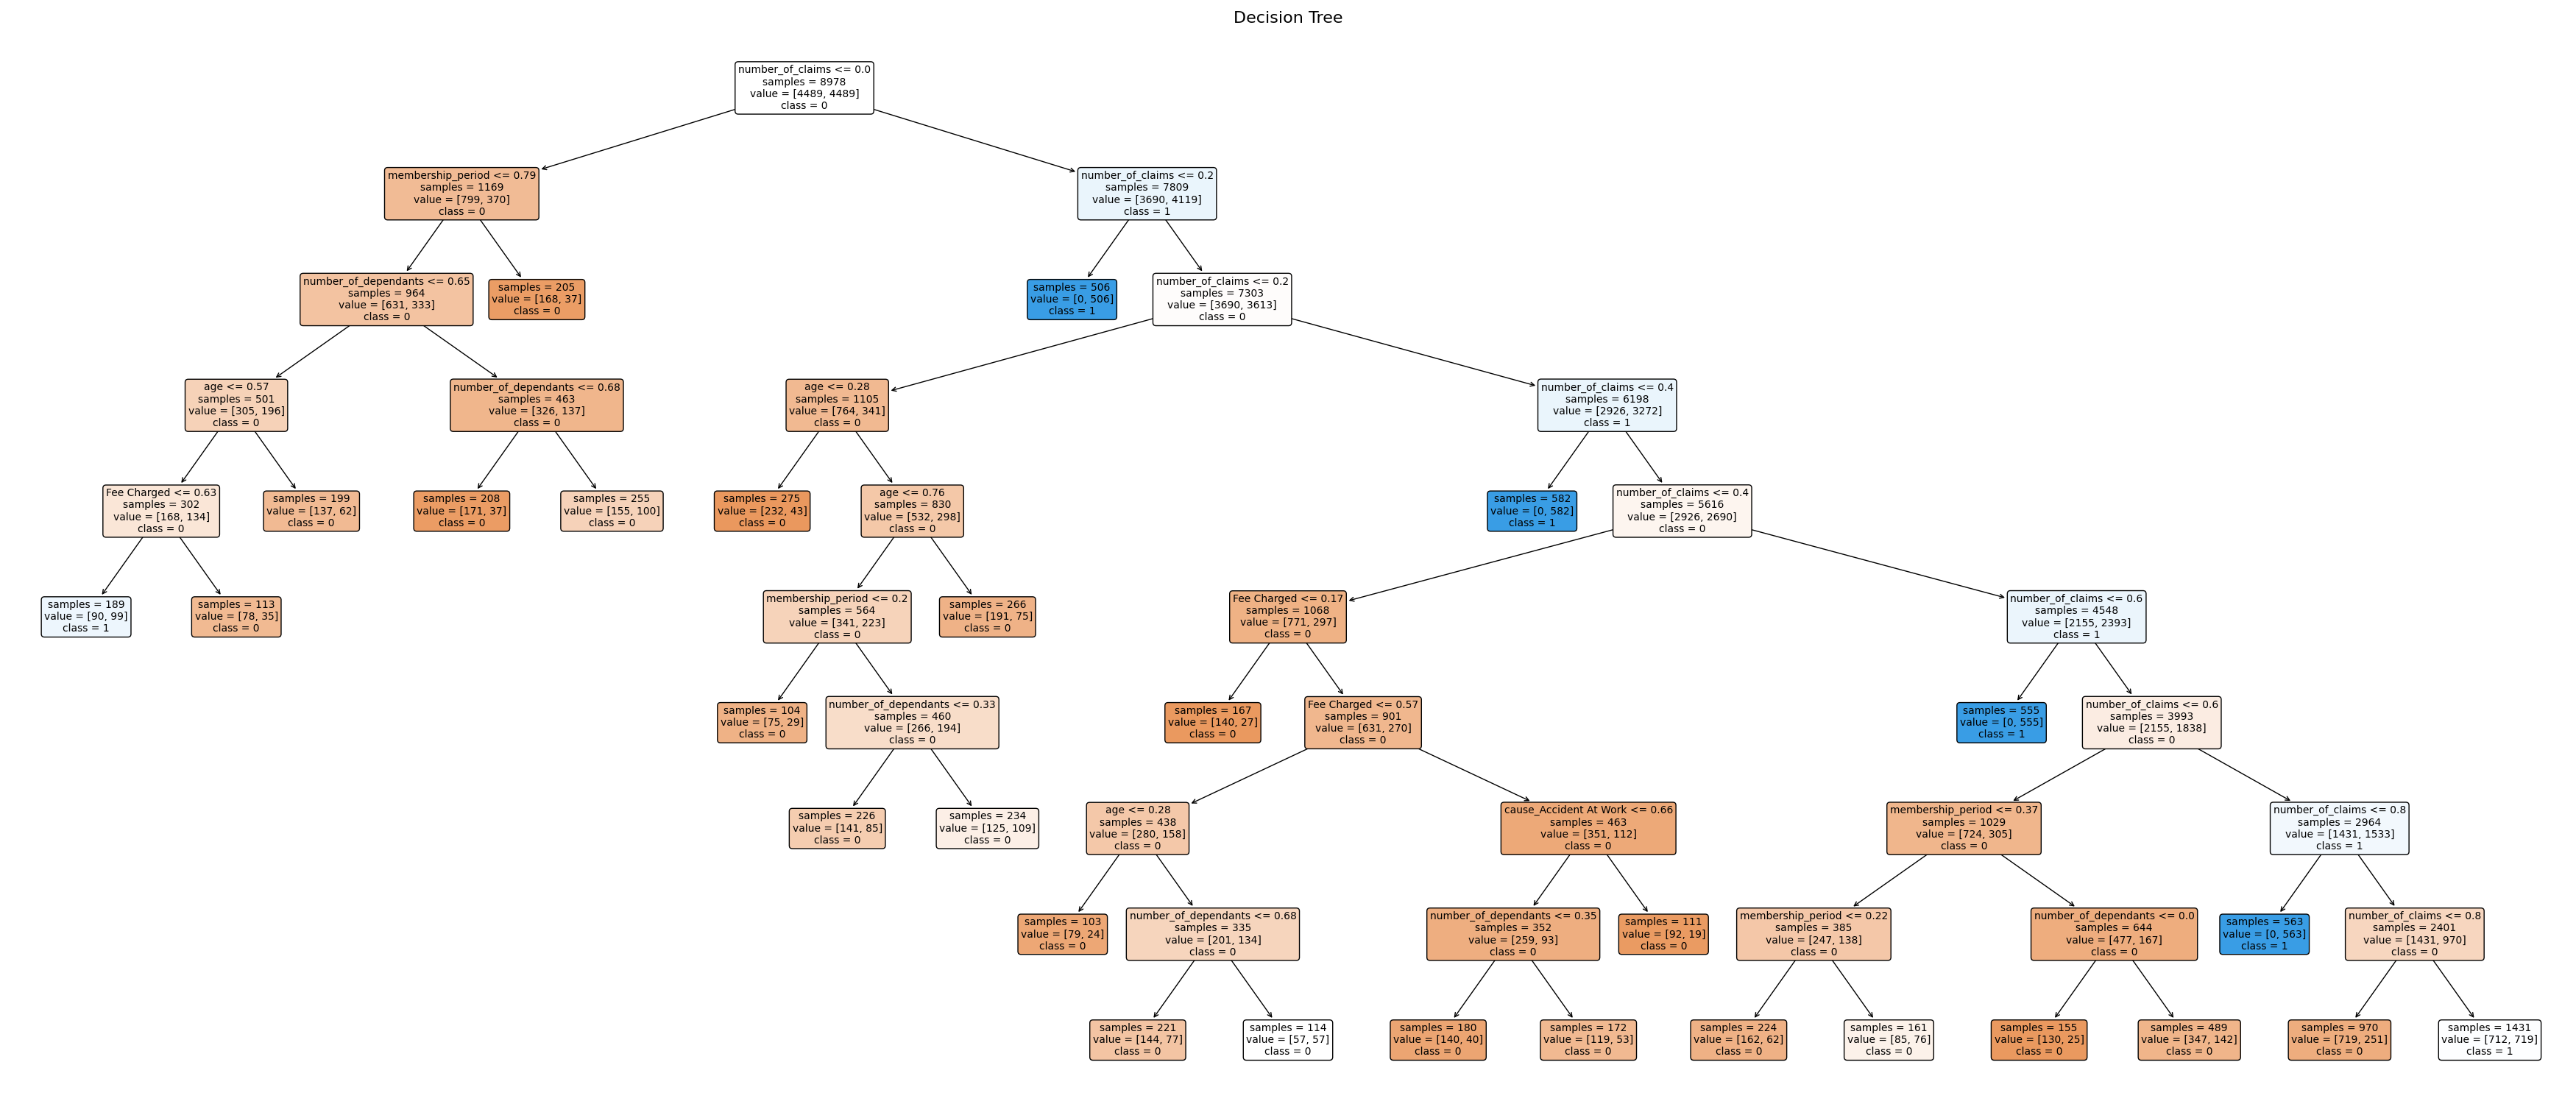


=== FULL RULE SET  ===

|-- number_of_claims <= 0.0002
|  |-- membership_period <= 0.7919
|  |  |-- number_of_dependants <= 0.6541
|  |  |  |-- age <= 0.5749
|  |  |  |  |-- Fee Charged <= 0.6301
|  |  |  |  |  |-- class: 1
|  |  |  |  |-- Fee Charged >  0.6301
|  |  |  |  |  |-- class: 0
|  |  |  |-- age >  0.5749
|  |  |  |  |-- class: 0
|  |  |-- number_of_dependants >  0.6541
|  |  |  |-- number_of_dependants <= 0.6840
|  |  |  |  |-- class: 0
|  |  |  |-- number_of_dependants >  0.6840
|  |  |  |  |-- class: 0
|  |-- membership_period >  0.7919
|  |  |-- class: 0
|-- number_of_claims >  0.0002
|  |-- number_of_claims <= 0.1998
|  |  |-- class: 1
|  |-- number_of_claims >  0.1998
|  |  |-- number_of_claims <= 0.2000
|  |  |  |-- age <= 0.2848
|  |  |  |  |-- class: 0
|  |  |  |-- age >  0.2848
|  |  |  |  |-- age <= 0.7627
|  |  |  |  |  |-- membership_period <= 0.2043
|  |  |  |  |  |  |-- class: 0
|  |  |  |  |  |-- membership_period >  0.2043
|  |  |  |  |  |  |-- number_of_dep

In [ ]:
# Menampilkan tree dan full rule set Decision Tree
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

# 1) Muat pipeline & ambil model terbaik
pipeline      = joblib.load(saved_path_dt7)
dt_pipeline   = pipeline.named_steps['grid_search'].best_estimator_
if hasattr(dt_pipeline, 'named_steps'):
    dt = dt_pipeline.named_steps['model']
else:
    dt = dt_pipeline

# 2) Ambil dan bersihkan nama fitur
raw_names = pipeline.named_steps['preprocessing'].get_feature_names_out()
feature_names = [n.split('__',1)[-1] for n in raw_names]

# 3) Visualisasi full‐depth tree
plt.figure(figsize=(35, 15))
plot_tree(
    dt,
    feature_names=feature_names,
    class_names=[str(c) for c in dt.classes_],
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=None,     # tampilkan semua level
    label='all',        # tampilkan split + samples + value + class di leaf
    impurity=False,     # hilangkan impurity
    proportion=False,   # tampilkan counts (samples), bukan proporsi
    precision=2         # presisi angka threshold
)
plt.title("Decision Tree", fontsize=16, pad=12)
plt.tight_layout()
plt.savefig("dt7_tree.png", dpi=300, bbox_inches="tight")
plt.show()

# 4) Cetak aturan lengkap tanpa weights
rules = export_text(
    dt,
    feature_names=feature_names,
    show_weights=False,  # hilangkan counts di rules
    spacing=2,
    decimals=4
)
print("\n=== FULL RULE SET  ===\n")
print(rules)


### Statistical Performances

In [ ]:
# Statistik Performa Decision Tree

# prediksi langsung pake pipeline:
y_pred = loaded_pipeline_dt7.predict(x_test)
y_prob = loaded_pipeline_dt7.predict_proba(x_test)[:, 1]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1132
           1       0.21      0.20      0.20       268

    accuracy                           0.70      1400
   macro avg       0.51      0.51      0.51      1400
weighted avg       0.70      0.70      0.70      1400



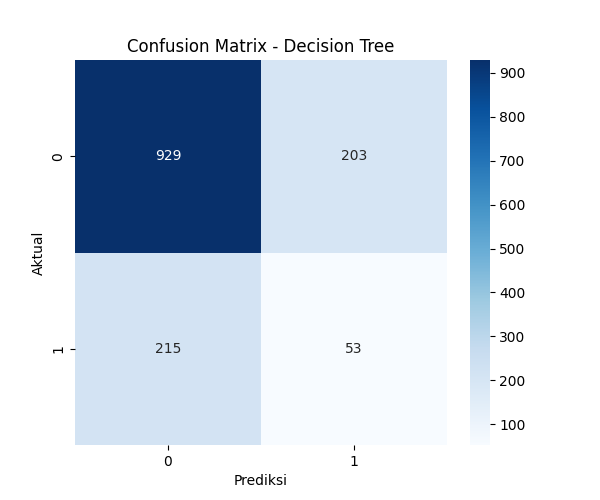

In [ ]:
# Confusion Matrix Decision Tree

# Predict langsung pakai pipeline
y_pred = loaded_pipeline_dt7.predict(x_test)

# 3. Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [ ]:
# Metrik ROC AUC, Sensitivity & Specificity Decision Tree

# Load pipeline, pisahkan antara preprocessor & model
pipeline    = joblib.load(saved_path_dt7)
preprocessor = pipeline.named_steps['preprocessing']
dt           = pipeline.named_steps['grid_search'].best_estimator_

# Ubah x_test menjadi fitur numerik saja
X_test_enc = preprocessor.transform(x_test)

# Prediksi
y_prob = dt.predict_proba(X_test_enc)[:, 1]
y_pred = dt.predict(X_test_enc)

# Hitung metrik
roc_auc = roc_auc_score(y_test, y_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"ROC AUC Score : {roc_auc:.4f}")
print(f"Sensitivity   : {sensitivity:.4f}")
print(f"Specificity   : {specificity:.4f}")


ROC AUC Score : 0.5006
Sensitivity   : 0.1978
Specificity   : 0.8207


<Figure size 800x600 with 0 Axes>

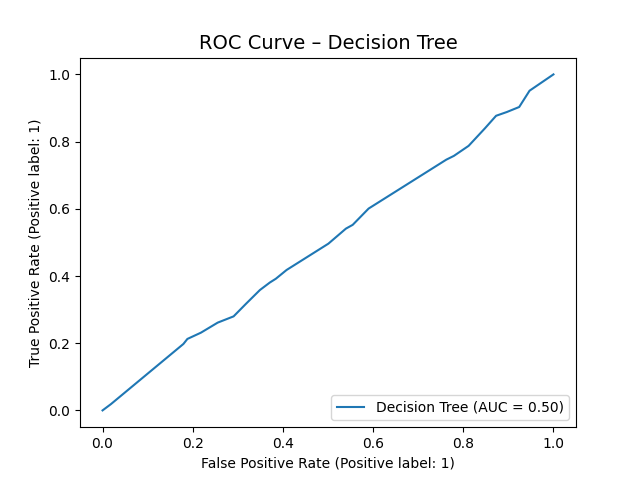

In [ ]:
# ROC Curve Decision Tree

# Ambil preprocessing step dan best model dari GridSearchCV
preproc      = loaded_pipeline_dt7.named_steps['preprocessing']
grid_search  = loaded_pipeline_dt7.named_steps['grid_search']
best_model   = grid_search.best_estimator_

# Bangun pipeline inference (tanpa SMOTE)
infer = Pipeline([
    ('preprocessing', preproc),
    ('model',          best_model)
])

# Hitung probabilitas positif
y_prob = infer.predict_proba(x_test)[:, 1]

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(
    y_test,
    y_prob,
    name="Decision Tree",
    pos_label=1
)
plt.title("ROC Curve – Decision Tree", fontsize=14)
plt.show()

In [ ]:
# Interasi simulasi 10x Decision Tree

# Muat kembali pipeline GridSearch (yang berisi 'grid_search' step) —
# Misalnya Anda menyimpannya sebagai 'grid_pipeline':
import joblib
grid_pipeline = joblib.load(saved_path_dt7)              # pipeline asli
grid_search   = grid_pipeline.named_steps['grid_search']
best_params   = grid_search.best_params_              # ← ambil BEST PARAM sebelum override

# Siapkan list untuk mengumpulkan metrik —
roc_auc_list     = []
specificity_list = []
sensitivity_list = []

# Loop 10 kali dengan pipeline fresh setiap iterasi —
for i in range(1, 11):
    # a) Buat ulang DecisionTreeClassifier pakai best_params
    model_dt = DecisionTreeClassifier(criterion='entropy', **best_params)
    pipeline = ImbPipeline([
        ('preprocessing', preprocessing),           # gunakan pipeline preprocessing Anda
        ('oversampling',   SMOTE(random_state=1)),  # SMOTE hanya di training
        ('model',          model_dt)
    ])
    
    # b) Fit di training
    pipeline.fit(x_train, y_train)
    
    # c) Predict & prob di test
    y_pred = pipeline.predict(x_test)
    y_prob = pipeline.predict_proba(x_test)[:, 1]
    
    # d) Hitung ROC-AUC
    roc = roc_auc_score(y_test, y_prob)
    roc_auc_list.append(roc)
    
    # e) Hitung specificity & sensitivity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spec = tn / (tn + fp) if (tn + fp) else 0
    sens = tp / (tp + fn) if (tp + fn) else 0
    specificity_list.append(spec)
    sensitivity_list.append(sens)
    
    # f) Tampilkan hasil iterasi
    print(f"Iteration {i:2d}  —  ROC AUC: {roc:.4f},  Spec: {spec:.4f},  Sens: {sens:.4f}")

# Rata-rata dan Std Deviasi —
roc_mean  = np.mean(roc_auc_list)
roc_std   = np.std(roc_auc_list, ddof=1)
spec_mean = np.mean(specificity_list)
spec_std  = np.std(specificity_list, ddof=1)
sens_mean = np.mean(sensitivity_list)
sens_std  = np.std(sensitivity_list, ddof=1)

print("\n" + "—"*50)
print("Rata-rata ± Std.Dev (10 iterasi):")
print(f"ROC AUC     : {roc_mean:.4f} ± {roc_std:.4f}")
print(f"Specificity : {spec_mean:.4f} ± {spec_std:.4f}")
print(f"Sensitivity : {sens_mean:.4f} ± {sens_std:.4f}")


Iteration  1  —  ROC AUC: 0.5006,  Spec: 0.8207,  Sens: 0.1978
Iteration  2  —  ROC AUC: 0.5006,  Spec: 0.8207,  Sens: 0.1978
Iteration  3  —  ROC AUC: 0.5006,  Spec: 0.8207,  Sens: 0.1978
Iteration  4  —  ROC AUC: 0.5006,  Spec: 0.8207,  Sens: 0.1978
Iteration  5  —  ROC AUC: 0.5006,  Spec: 0.8207,  Sens: 0.1978
Iteration  6  —  ROC AUC: 0.5006,  Spec: 0.8207,  Sens: 0.1978
Iteration  7  —  ROC AUC: 0.5006,  Spec: 0.8207,  Sens: 0.1978
Iteration  8  —  ROC AUC: 0.5006,  Spec: 0.8207,  Sens: 0.1978
Iteration  9  —  ROC AUC: 0.5006,  Spec: 0.8207,  Sens: 0.1978
Iteration 10  —  ROC AUC: 0.5006,  Spec: 0.8207,  Sens: 0.1978

——————————————————————————————————————————————————
Rata-rata ± Std.Dev (10 iterasi):
ROC AUC     : 0.5006 ± 0.0000
Specificity : 0.8207 ± 0.0000
Sensitivity : 0.1978 ± 0.0000


## RANDOM FOREST

### Model

In [ ]:
# Training Model Random Forest

param_rf = {'max_depth': np.arange(5, 10),
            'min_samples_leaf': (50, 100, 150, 200, 250, 300, 350, 400, 450, 500),
            'min_samples_split': (50, 100, 150, 200, 250, 300, 350, 400, 450, 500)}

rf_grid = GridSearchCV(RandomForestClassifier(n_estimators=250,
                                              criterion='entropy',
                                              n_jobs=-1),
                       param_grid=param_rf, scoring='roc_auc',cv=5)

rf_pipeline = ImbPipeline([
    ('preprocessing', preprocessing),
    ('oversampling', SMOTE(random_state=1)),
    ('grid_search', rf_grid)
])

rf_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical',
                                                  Pipeline(steps=[('Scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'Fee Charged',
                                                   'membership_period',
                                                   'number_of_claims',
                                                   'number_of_dependants']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'relationship',
                                                   'cause'])])),
                ('oversampling', SMOTE(random_state=1)),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(criterion='entropy',
                                                               n_estimators=250,
                                                               n_jobs=-1),
                              param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                                          'min_samples_leaf': (50, 100, 150,
                                                               200, 250, 300,
                                                               350, 400, 450,
                                                               500),
                                          'min_samples_split': (50, 100, 150,
                                                                200, 250, 300,
                                                                350, 400, 450,
                                                                500)},
                              scoring='roc_auc'))])

**Menyimpan Model**

In [ ]:
# Menyimpan Model Random Forest

import joblib
import os
from datetime import datetime

def save_full_pipeline(pipeline, model_name="rf7_full_pipeline", models_dir="rf7_models"):
    """
    Simpan seluruh pipeline (preprocessing, oversampling, grid_search/model) 
    sebagai satu file .pkl yang bisa langsung di-load kembali.
    """
    os.makedirs(models_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{models_dir}/{model_name}_{timestamp}.pkl"
    joblib.dump(pipeline, filename)
    print(f"✅ Full pipeline saved to: {filename}")
    return filename

# Contoh pemakaian, setelah kamu .fit(rf_pipeline, x_train, y_train):
saved_path_rf7 = save_full_pipeline(rf_pipeline, model_name="rf7_gridsearch_full")


✅ Full pipeline saved to: rf7_models/rf7_gridsearch_full_20250523_023738.pkl


In [ ]:
# Menampilkan hyperparameter terbaik Random Forest

import joblib

# Load seluruh pipeline
loaded_pipeline_rf7 = joblib.load(saved_path_rf7)

# Akses GridSearchCV di dalam pipeline
gs = loaded_pipeline_rf7.named_steps['grid_search']

# Ambil dan print best hyperparameters
best_params = gs.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'max_depth': 9, 'min_samples_leaf': 50, 'min_samples_split': 100}


In [263]:
# Ambil hasil CV dari GridSearchCV
cv_results = loaded_pipeline_rf7.named_steps['grid_search'].cv_results_

# 3) Tampilkan sebagai DataFrame dan sortir berdasarkan rank_test_score
pd.DataFrame(cv_results).sort_values("rank_test_score", ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
401,1.461651,0.195300,0.106749,0.008368,9,50,100,"{'max_depth': 9, 'min_samples_leaf': 50, 'min_...",0.522897,0.814670,0.894684,0.896698,0.894342,0.804658,0.144298,1
400,1.728018,0.486463,0.158610,0.044334,9,50,50,"{'max_depth': 9, 'min_samples_leaf': 50, 'min_...",0.525844,0.805595,0.893092,0.894897,0.887677,0.801421,0.141804,2
402,1.476291,0.079155,0.112638,0.010434,9,50,150,"{'max_depth': 9, 'min_samples_leaf': 50, 'min_...",0.520581,0.806074,0.889083,0.885771,0.876449,0.795592,0.140820,3
300,1.290391,0.016464,0.118307,0.012882,8,50,50,"{'max_depth': 8, 'min_samples_leaf': 50, 'min_...",0.519677,0.802899,0.886000,0.883647,0.875396,0.793524,0.140326,4
403,1.465833,0.126595,0.154538,0.048225,9,50,200,"{'max_depth': 9, 'min_samples_leaf': 50, 'min_...",0.517293,0.804304,0.885509,0.883677,0.872887,0.792734,0.140928,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.765213,0.016003,0.094705,0.000643,6,500,350,"{'max_depth': 6, 'min_samples_leaf': 500, 'min...",0.497450,0.699096,0.772421,0.785298,0.743997,0.699652,0.105340,496
96,0.800783,0.031539,0.099654,0.006717,5,500,350,"{'max_depth': 5, 'min_samples_leaf': 500, 'min...",0.494477,0.699362,0.772030,0.785905,0.746135,0.699582,0.106710,497
393,1.193568,0.107739,0.164705,0.032533,8,500,200,"{'max_depth': 8, 'min_samples_leaf': 500, 'min...",0.496705,0.696500,0.771526,0.788636,0.744196,0.699512,0.106081,498
97,0.817465,0.025473,0.099753,0.006528,5,500,400,"{'max_depth': 5, 'min_samples_leaf': 500, 'min...",0.498460,0.708390,0.780584,0.781413,0.728243,0.699418,0.104505,499


### Statistical Performances

In [ ]:
# Statistik performa Random Forest

# prediksi langsung pake pipeline:
y_pred = loaded_pipeline_rf7.predict(x_test)
y_prob = loaded_pipeline_rf7.predict_proba(x_test)[:, 1]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1132
           1       0.18      0.24      0.20       268

    accuracy                           0.64      1400
   macro avg       0.49      0.49      0.49      1400
weighted avg       0.68      0.64      0.66      1400



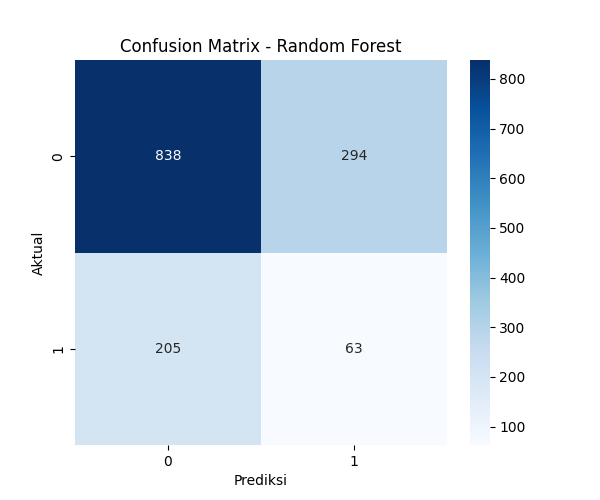

In [ ]:
# Confusion Matrix Random Forest

# Predict langsung pakai pipeline
y_pred = loaded_pipeline_rf7.predict(x_test)

# 3. Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
# Metrik ROC AUC, Sensitivity & Specificity Random Forest

# Load pipeline, pisahkan antara preprocessor & model
pipeline    = joblib.load(saved_path_rf7)
preprocessor = pipeline.named_steps['preprocessing']
rf           = pipeline.named_steps['grid_search'].best_estimator_

# Ubah x_test menjadi fitur numerik saja
X_test_enc = preprocessor.transform(x_test)

# Prediksi
y_prob = rf.predict_proba(X_test_enc)[:, 1]
y_pred = rf.predict(X_test_enc)

# Hitung metrik
roc_auc = roc_auc_score(y_test, y_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"ROC AUC Score : {roc_auc:.4f}")
print(f"Sensitivity   : {sensitivity:.4f}")
print(f"Specificity   : {specificity:.4f}")


ROC AUC Score : 0.4796
Sensitivity   : 0.2351
Specificity   : 0.7403


<Figure size 800x600 with 0 Axes>

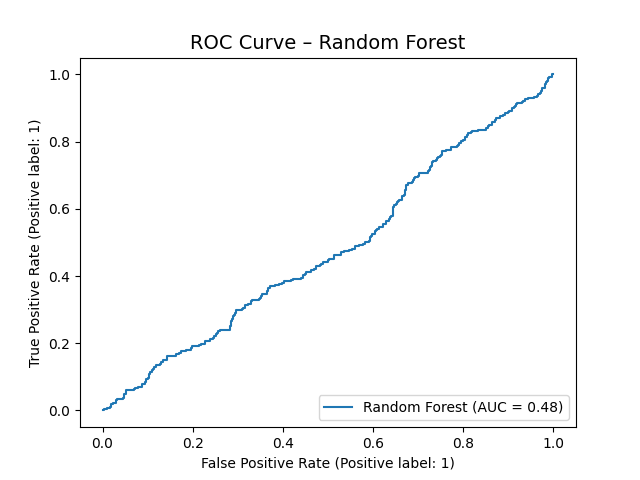

In [ ]:
# ROC Curve Random Forest

# Ambil preprocessing step dan best model dari GridSearchCV
preproc      = loaded_pipeline_rf7.named_steps['preprocessing']
grid_search  = loaded_pipeline_rf7.named_steps['grid_search']
best_model   = grid_search.best_estimator_

# Bangun pipeline inference (tanpa SMOTE)
infer = Pipeline([
    ('preprocessing', preproc),
    ('model',          best_model)
])

# Hitung probabilitas positif
y_prob = infer.predict_proba(x_test)[:, 1]

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(
    y_test,
    y_prob,
    name="Random Forest",
    pos_label=1
)
plt.title("ROC Curve – Random Forest", fontsize=14)
plt.show()

In [ ]:
# Iterasi simulasi 10x Random Forest

# Muat kembali pipeline GridSearch (yang berisi 'grid_search' step) —
# Misalnya Anda menyimpannya sebagai 'grid_pipeline':
import joblib
grid_pipeline = joblib.load(saved_path_rf7)              # pipeline asli
grid_search   = grid_pipeline.named_steps['grid_search']
best_params   = grid_search.best_params_              # ← ambil BEST PARAM sebelum override

# Siapkan list untuk mengumpulkan metrik —
roc_auc_list     = []
specificity_list = []
sensitivity_list = []

# Loop 10 kali dengan pipeline fresh setiap iterasi —
for i in range(1, 11):
    # a) Buat ulang RandomForestClassifier pakai best_params
    model_rf = RandomForestClassifier(criterion='entropy', **best_params)
    pipeline = ImbPipeline([
        ('preprocessing', preprocessing),           # gunakan pipeline preprocessing Anda
        ('oversampling',   SMOTE(random_state=1)),  # SMOTE hanya di training
        ('model',          model_rf)
    ])
    
    # b) Fit di training
    pipeline.fit(x_train, y_train)
    
    # c) Predict & prob di test
    y_pred = pipeline.predict(x_test)
    y_prob = pipeline.predict_proba(x_test)[:, 1]
    
    # d) Hitung ROC-AUC
    roc = roc_auc_score(y_test, y_prob)
    roc_auc_list.append(roc)
    
    # e) Hitung specificity & sensitivity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spec = tn / (tn + fp) if (tn + fp) else 0
    sens = tp / (tp + fn) if (tp + fn) else 0
    specificity_list.append(spec)
    sensitivity_list.append(sens)
    
    # f) Tampilkan hasil iterasi
    print(f"Iteration {i:2d}  —  ROC AUC: {roc:.4f},  Spec: {spec:.4f},  Sens: {sens:.4f}")

# Rata-rata dan Std Deviasi —
roc_mean  = np.mean(roc_auc_list)
roc_std   = np.std(roc_auc_list, ddof=1)
spec_mean = np.mean(specificity_list)
spec_std  = np.std(specificity_list, ddof=1)
sens_mean = np.mean(sensitivity_list)
sens_std  = np.std(sensitivity_list, ddof=1)

print("\n" + "—"*50)
print("Rata-rata ± Std.Dev (10 iterasi):")
print(f"ROC AUC     : {roc_mean:.4f} ± {roc_std:.4f}")
print(f"Specificity : {spec_mean:.4f} ± {spec_std:.4f}")
print(f"Sensitivity : {sens_mean:.4f} ± {sens_std:.4f}")


Iteration  1  —  ROC AUC: 0.4774,  Spec: 0.7376,  Sens: 0.2425
Iteration  2  —  ROC AUC: 0.4800,  Spec: 0.7341,  Sens: 0.2612
Iteration  3  —  ROC AUC: 0.4784,  Spec: 0.7376,  Sens: 0.2575
Iteration  4  —  ROC AUC: 0.4754,  Spec: 0.7677,  Sens: 0.2276
Iteration  5  —  ROC AUC: 0.4729,  Spec: 0.7456,  Sens: 0.2463
Iteration  6  —  ROC AUC: 0.4750,  Spec: 0.7111,  Sens: 0.2575
Iteration  7  —  ROC AUC: 0.4820,  Spec: 0.7367,  Sens: 0.2799
Iteration  8  —  ROC AUC: 0.4709,  Spec: 0.7182,  Sens: 0.2575
Iteration  9  —  ROC AUC: 0.4725,  Spec: 0.7350,  Sens: 0.2463
Iteration 10  —  ROC AUC: 0.4833,  Spec: 0.7244,  Sens: 0.2463

——————————————————————————————————————————————————
Rata-rata ± Std.Dev (10 iterasi):
ROC AUC     : 0.4768 ± 0.0042
Specificity : 0.7348 ± 0.0155
Sensitivity : 0.2522 ± 0.0139


## XGBOOST

### Model

In [ ]:
# Training Model XGBoost

param_xgb = {'max_depth': np.arange(5, 10),
             'eta': [0.01, 0.05, 0.1, 0.15, 0.2],
             'gamma': [0, 0.1, 1, 3, 5],
             'lambda': [0, 0.1, 0.2, 1, 5]}

xgb_grid = GridSearchCV(XGBClassifier(n_estimators=250,
                                      subsample=0.8,
                                      objective='binary:logistic',
                                      eval_metric='logloss'),
                        param_grid=param_xgb, cv=5, scoring ='roc_auc', n_jobs=-1)

xgb_pipeline = ImbPipeline([('preprocessing', preprocessing),
                            ('oversampling', SMOTE(random_state=1)),
                            ('grid_search', xgb_grid)])

xgb_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical',
                                                  Pipeline(steps=[('Scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'Fee Charged',
                                                   'membership_period',
                                                   'number_of_claims',
                                                   'number_of_dependants']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'relationship',
                                                   'cause'])])...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=250,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...),
                              n_jobs=-1,
                              param_grid={'eta': [0.01, 0.05, 0.1, 0.15, 0.2],
                                          'gamma': [0, 0.1, 1, 3, 5],
                                          'lambda': [0, 0.1, 0.2, 1, 5],
                                          'max_depth': array([5, 6, 7, 8, 9])},
                              scoring='roc_auc'))])

**Menyimpan Model**

In [ ]:
# Menyimpan Model XGBoost

import joblib
import os
from datetime import datetime

def save_full_pipeline(pipeline, model_name="xgb7_full_pipeline", models_dir="xgb7_models"):
    """
    Simpan seluruh pipeline (preprocessing, oversampling, grid_search/model) 
    sebagai satu file .pkl yang bisa langsung di-load kembali.
    """
    os.makedirs(models_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{models_dir}/{model_name}_{timestamp}.pkl"
    joblib.dump(pipeline, filename)
    print(f"✅ Full pipeline saved to: {filename}")
    return filename

# Contoh pemakaian, setelah kamu .fit(xgb7_pipeline, x_train, y_train):
saved_path_xgb7 = save_full_pipeline(xgb_pipeline, model_name="xgb7_gridsearch_full")


✅ Full pipeline saved to: xgb7_models/xgb7_gridsearch_full_20250523_025519.pkl


In [ ]:
# Menampilkan hyperparameter terbaik XGBoost

import joblib

# Load seluruh pipeline
loaded_pipeline_xgb7 = joblib.load(saved_path_xgb7)

# Akses GridSearchCV di dalam pipeline
gs = loaded_pipeline_xgb7.named_steps['grid_search']

# Ambil dan print best hyperparameters
best_params = gs.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'eta': 0.05, 'gamma': 0.1, 'lambda': 0, 'max_depth': 9}


In [273]:
# Ambil hasil CV dari GridSearchCV
cv_results = loaded_pipeline_xgb7.named_steps['grid_search'].cv_results_

# 3) Tampilkan sebagai DataFrame dan sortir berdasarkan rank_test_score
pd.DataFrame(cv_results).sort_values("rank_test_score", ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta,param_gamma,param_lambda,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
154,3.608114,0.116722,0.060983,0.002264,0.05,0.1,0,9,"{'eta': 0.05, 'gamma': 0.1, 'lambda': 0, 'max_...",0.653417,0.892860,0.986564,0.987957,0.989548,0.902069,0.129678,1
144,4.697879,0.542580,0.060899,0.010227,0.05,0,1,9,"{'eta': 0.05, 'gamma': 0, 'lambda': 1, 'max_de...",0.651415,0.890386,0.984936,0.988186,0.991414,0.901268,0.130557,2
134,3.504003,0.226492,0.068166,0.012549,0.05,0,0.1,9,"{'eta': 0.05, 'gamma': 0, 'lambda': 0.1, 'max_...",0.647806,0.892915,0.985150,0.987715,0.990709,0.900859,0.131773,3
164,3.107351,0.162384,0.056401,0.003499,0.05,0.1,0.2,9,"{'eta': 0.05, 'gamma': 0.1, 'lambda': 0.2, 'ma...",0.643382,0.895194,0.986292,0.987492,0.990109,0.900494,0.133488,4
169,3.531709,0.281787,0.063063,0.003118,0.05,0.1,1,9,"{'eta': 0.05, 'gamma': 0.1, 'lambda': 1, 'max_...",0.647102,0.890658,0.984859,0.988966,0.990454,0.900408,0.132168,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,0.850389,0.040877,0.018000,0.001095,0.2,5,5,7,"{'eta': 0.2, 'gamma': 5, 'lambda': 5, 'max_dep...",0.546373,0.865892,0.966400,0.973332,0.972111,0.864822,0.164326,621
495,0.817198,0.025779,0.019802,0.001939,0.15,5,5,5,"{'eta': 0.15, 'gamma': 5, 'lambda': 5, 'max_de...",0.550307,0.867101,0.965355,0.971067,0.969206,0.864607,0.161997,622
120,2.096196,0.276378,0.035690,0.003481,0.01,5,5,5,"{'eta': 0.01, 'gamma': 5, 'lambda': 5, 'max_de...",0.564962,0.861324,0.962300,0.966745,0.966258,0.864318,0.154988,623
620,0.836080,0.044413,0.017600,0.001020,0.2,5,5,5,"{'eta': 0.2, 'gamma': 5, 'lambda': 5, 'max_dep...",0.549915,0.866251,0.966736,0.968833,0.968846,0.864116,0.161983,624


### Statistical Performances

In [ ]:
# Statistik Performa XGBoost

# prediksi langsung pake pipeline:
y_pred = loaded_pipeline_xgb7.predict(x_test)
y_prob = loaded_pipeline_xgb7.predict_proba(x_test)[:, 1]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1132
           1       0.24      0.05      0.09       268

    accuracy                           0.79      1400
   macro avg       0.52      0.51      0.48      1400
weighted avg       0.70      0.79      0.73      1400



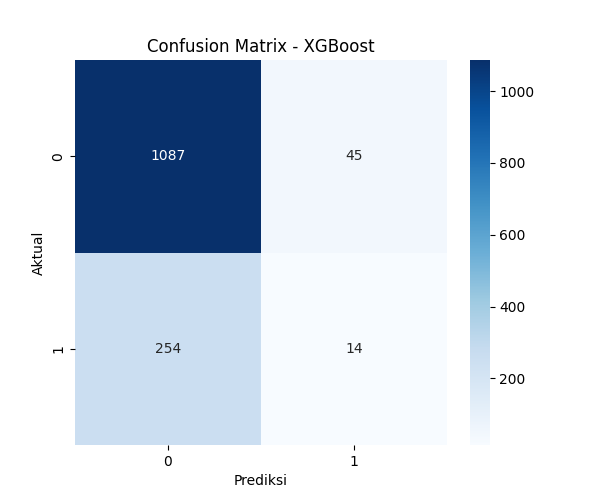

In [ ]:
# Confusion Matrix XGBoost

# Predict langsung pakai pipeline
y_pred = loaded_pipeline_xgb7.predict(x_test)

# 3. Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [ ]:
# Metrik ROC AUC, Sensitivity & Specificity XGBoost

# Load pipeline, pisahkan antara preprocessor & model
pipeline    = joblib.load(saved_path_xgb7)
preprocessor = pipeline.named_steps['preprocessing']
xgb           = pipeline.named_steps['grid_search'].best_estimator_

# Ubah x_test menjadi fitur numerik saja
X_test_enc = preprocessor.transform(x_test)

# Prediksi
y_prob = xgb.predict_proba(X_test_enc)[:, 1]
y_pred = xgb.predict(X_test_enc)

# Hitung metrik
roc_auc = roc_auc_score(y_test, y_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"ROC AUC Score : {roc_auc:.4f}")
print(f"Sensitivity   : {sensitivity:.4f}")
print(f"Specificity   : {specificity:.4f}")


ROC AUC Score : 0.4842
Sensitivity   : 0.0522
Specificity   : 0.9602


<Figure size 800x600 with 0 Axes>

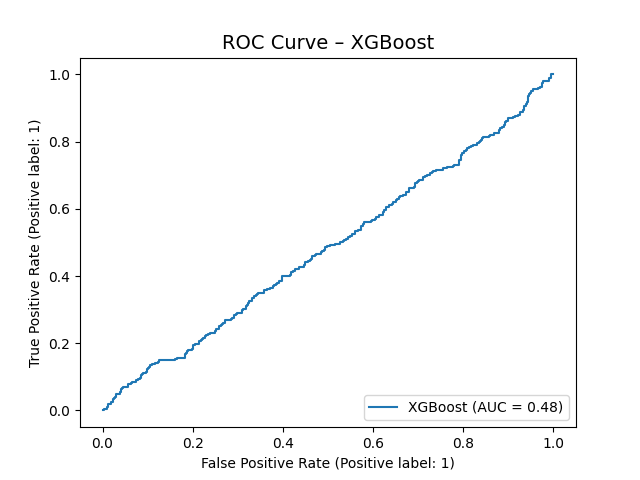

In [ ]:
# ROC Curve XGBoost

# Ambil preprocessing step dan best model dari GridSearchCV
preproc      = loaded_pipeline_xgb7.named_steps['preprocessing']
grid_search  = loaded_pipeline_xgb7.named_steps['grid_search']
best_model   = grid_search.best_estimator_

# Bangun pipeline inference (tanpa SMOTE)
infer = Pipeline([
    ('preprocessing', preproc),
    ('model',          best_model)
])

# Hitung probabilitas positif
y_prob = infer.predict_proba(x_test)[:, 1]

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(
    y_test,
    y_prob,
    name="XGBoost",
    pos_label=1
)
plt.title("ROC Curve – XGBoost", fontsize=14)
plt.show()

In [ ]:
# Iterasi Simulasi 10x XGBoost

# Muat kembali pipeline GridSearch (yang berisi 'grid_search' step) —
# Misalnya Anda menyimpannya sebagai 'grid_pipeline':
import joblib
grid_pipeline = joblib.load(saved_path_xgb7)              # pipeline asli
grid_search   = grid_pipeline.named_steps['grid_search']
best_params   = grid_search.best_params_              # ← ambil BEST PARAM sebelum override

# Siapkan list untuk mengumpulkan metrik —
roc_auc_list     = []
specificity_list = []
sensitivity_list = []

# Loop 10 kali dengan pipeline fresh setiap iterasi —
for i in range(1, 11):
    # a) Buat ulang XGBClassifier pakai best_params
    model_xgb = XGBClassifier(criterion='entropy', **best_params)
    pipeline = ImbPipeline([
        ('preprocessing', preprocessing),           # gunakan pipeline preprocessing Anda
        ('oversampling',   SMOTE(random_state=1)),  # SMOTE hanya di training
        ('model',          model_xgb)
    ])
    
    # b) Fit di training
    pipeline.fit(x_train, y_train)
    
    # c) Predict & prob di test
    y_pred = pipeline.predict(x_test)
    y_prob = pipeline.predict_proba(x_test)[:, 1]
    
    # d) Hitung ROC-AUC
    roc = roc_auc_score(y_test, y_prob)
    roc_auc_list.append(roc)
    
    # e) Hitung specificity & sensitivity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spec = tn / (tn + fp) if (tn + fp) else 0
    sens = tp / (tp + fn) if (tp + fn) else 0
    specificity_list.append(spec)
    sensitivity_list.append(sens)
    
    # f) Tampilkan hasil iterasi
    print(f"Iteration {i:2d}  —  ROC AUC: {roc:.4f},  Spec: {spec:.4f},  Sens: {sens:.4f}")

# Rata-rata dan Std Deviasi —
roc_mean  = np.mean(roc_auc_list)
roc_std   = np.std(roc_auc_list, ddof=1)
spec_mean = np.mean(specificity_list)
spec_std  = np.std(specificity_list, ddof=1)
sens_mean = np.mean(sensitivity_list)
sens_std  = np.std(sensitivity_list, ddof=1)

print("\n" + "—"*50)
print("Rata-rata ± Std.Dev (10 iterasi):")
print(f"ROC AUC     : {roc_mean:.4f} ± {roc_std:.4f}")
print(f"Specificity : {spec_mean:.4f} ± {spec_std:.4f}")
print(f"Sensitivity : {sens_mean:.4f} ± {sens_std:.4f}")


Iteration  1  —  ROC AUC: 0.4837,  Spec: 0.9673,  Sens: 0.0224
Iteration  2  —  ROC AUC: 0.4837,  Spec: 0.9673,  Sens: 0.0224
Iteration  3  —  ROC AUC: 0.4837,  Spec: 0.9673,  Sens: 0.0224
Iteration  4  —  ROC AUC: 0.4837,  Spec: 0.9673,  Sens: 0.0224
Iteration  5  —  ROC AUC: 0.4837,  Spec: 0.9673,  Sens: 0.0224
Iteration  6  —  ROC AUC: 0.4837,  Spec: 0.9673,  Sens: 0.0224
Iteration  7  —  ROC AUC: 0.4837,  Spec: 0.9673,  Sens: 0.0224
Iteration  8  —  ROC AUC: 0.4837,  Spec: 0.9673,  Sens: 0.0224
Iteration  9  —  ROC AUC: 0.4837,  Spec: 0.9673,  Sens: 0.0224
Iteration 10  —  ROC AUC: 0.4837,  Spec: 0.9673,  Sens: 0.0224

——————————————————————————————————————————————————
Rata-rata ± Std.Dev (10 iterasi):
ROC AUC     : 0.4837 ± 0.0000
Specificity : 0.9673 ± 0.0000
Sensitivity : 0.0224 ± 0.0000


## SURROGATE XGBOOST

In [ ]:
# Prediksi XGBoost sebagai y_train Surrogate XGBoost

import joblib
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load kembali full‐pipeline XGBoost Anda
#    (preprocessing + SMOTE + GridSearchCV)
xgb_full = joblib.load(saved_path_xgb7)

# Ambil GridSearchCV dan best estimator (XGBClassifier)
gs = xgb_full.named_steps['grid_search']
best_xgb: XGBClassifier = gs.best_estimator_

# Siapkan inference‐pipeline tanpa SMOTE:
#    hanya preprocessing + best_xgb
infer_xgb = Pipeline([
    ('preprocessing', xgb_full.named_steps['preprocessing']),
    ('model',          best_xgb)
])

# Hitung prediksi XGB sebagai target surrogate:
#    a) hard labels
y_surr = infer_xgb.predict(x_train)

In [ ]:
# Training Model Surrogate XGBoost 

param_sxgb = {'max_depth': np.arange(5, 10), 
            'min_samples_leaf': (50, 100, 150, 200, 250, 300, 350, 400, 450, 500),
            'min_samples_split': (50, 100, 150, 200, 250, 300, 350, 400, 450, 500)}

# Create pipelines with SMOTE for each model (nested GridSearchCV)
sxgb_grid = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), param_grid=param_sxgb, scoring='roc_auc', cv=5) 

sxgb_pipeline = ImbPipeline([ 
    ('preprocessing', preprocessing),
    ('oversampling', SMOTE(random_state=1)),
    ('grid_search', sxgb_grid) 
])

sxgb_pipeline.fit(x_train, y_surr)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical',
                                                  Pipeline(steps=[('Scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'Fee Charged',
                                                   'membership_period',
                                                   'number_of_claims',
                                                   'number_of_dependants']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'relationship',
                                                   'cause'])])),
                ('oversampling', SMOTE(random_state=1)),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=DecisionTreeClassifier(criterion='entropy'),
                              param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                                          'min_samples_leaf': (50, 100, 150,
                                                               200, 250, 300,
                                                               350, 400, 450,
                                                               500),
                                          'min_samples_split': (50, 100, 150,
                                                                200, 250, 300,
                                                                350, 400, 450,
                                                                500)},
                              scoring='roc_auc'))])

**Menyimpan Model**

In [ ]:
# Menyimpan model Surrogate XGBoost

import joblib
import os
from datetime import datetime

def save_full_pipeline(pipeline, model_name="sxgb7_full_pipeline", models_dir="sxgb7_models"):
    """
    Simpan seluruh pipeline (preprocessing, oversampling, grid_search/model) 
    sebagai satu file .pkl yang bisa langsung di-load kembali.
    """
    os.makedirs(models_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{models_dir}/{model_name}_{timestamp}.pkl"
    joblib.dump(pipeline, filename)
    print(f"✅ Full pipeline saved to: {filename}")
    return filename

# Contoh pemakaian, setelah kamu .fit(sxgb_pipeline, x_train, y_train):
saved_path_sxgb7 = save_full_pipeline(sxgb_pipeline, model_name="sxgb7_gridsearch_full")


✅ Full pipeline saved to: sxgb7_models/sxgb7_gridsearch_full_20250523_032253.pkl


In [ ]:
# Menampilkan hyperparameter terbaik Surrogate XGBoost

import joblib

# Load seluruh pipeline
loaded_pipeline_sxgb7 = joblib.load(saved_path_sxgb7)

# Akses GridSearchCV di dalam pipeline
gs = loaded_pipeline_sxgb7.named_steps['grid_search']

# Ambil dan print best hyperparameters
best_params = gs.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'max_depth': 9, 'min_samples_leaf': 50, 'min_samples_split': 300}


In [283]:
# Ambil hasil CV dari GridSearchCV
cv_results = loaded_pipeline_sxgb7.named_steps['grid_search'].cv_results_

# 3) Tampilkan sebagai DataFrame dan sortir berdasarkan rank_test_score
pd.DataFrame(cv_results).sort_values("rank_test_score", ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
405,0.091997,0.011534,0.003795,0.001469,9,50,300,"{'max_depth': 9, 'min_samples_leaf': 50, 'min_...",0.529965,0.852166,0.893506,0.907535,0.890652,0.814765,0.143579,1
406,0.085580,0.003117,0.004237,0.000960,9,50,350,"{'max_depth': 9, 'min_samples_leaf': 50, 'min_...",0.529540,0.851138,0.892761,0.908444,0.891073,0.814591,0.143776,2
401,0.075233,0.001971,0.002978,0.000068,9,50,100,"{'max_depth': 9, 'min_samples_leaf': 50, 'min_...",0.533098,0.843969,0.896927,0.906970,0.891245,0.814442,0.142331,3
402,0.075014,0.002469,0.002805,0.000396,9,50,150,"{'max_depth': 9, 'min_samples_leaf': 50, 'min_...",0.526275,0.850369,0.896864,0.907868,0.890779,0.814431,0.145382,4
400,0.075207,0.002717,0.002810,0.000405,9,50,50,"{'max_depth': 9, 'min_samples_leaf': 50, 'min_...",0.533098,0.843969,0.896855,0.906970,0.891245,0.814427,0.142322,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.083863,0.026389,0.005705,0.003384,5,500,150,"{'max_depth': 5, 'min_samples_leaf': 500, 'min...",0.493358,0.710771,0.746691,0.764017,0.725100,0.687988,0.098999,491
91,0.078206,0.012906,0.005998,0.001993,5,500,100,"{'max_depth': 5, 'min_samples_leaf': 500, 'min...",0.493358,0.710771,0.746691,0.764017,0.725100,0.687988,0.098999,491
90,0.038239,0.008291,0.003414,0.001852,5,500,50,"{'max_depth': 5, 'min_samples_leaf': 500, 'min...",0.493358,0.710771,0.746691,0.764017,0.725100,0.687988,0.098999,491
95,0.069125,0.015813,0.005689,0.002185,5,500,300,"{'max_depth': 5, 'min_samples_leaf': 500, 'min...",0.493358,0.710771,0.746691,0.764017,0.725100,0.687988,0.098999,491


**Menampilkan Rules dan Tree**

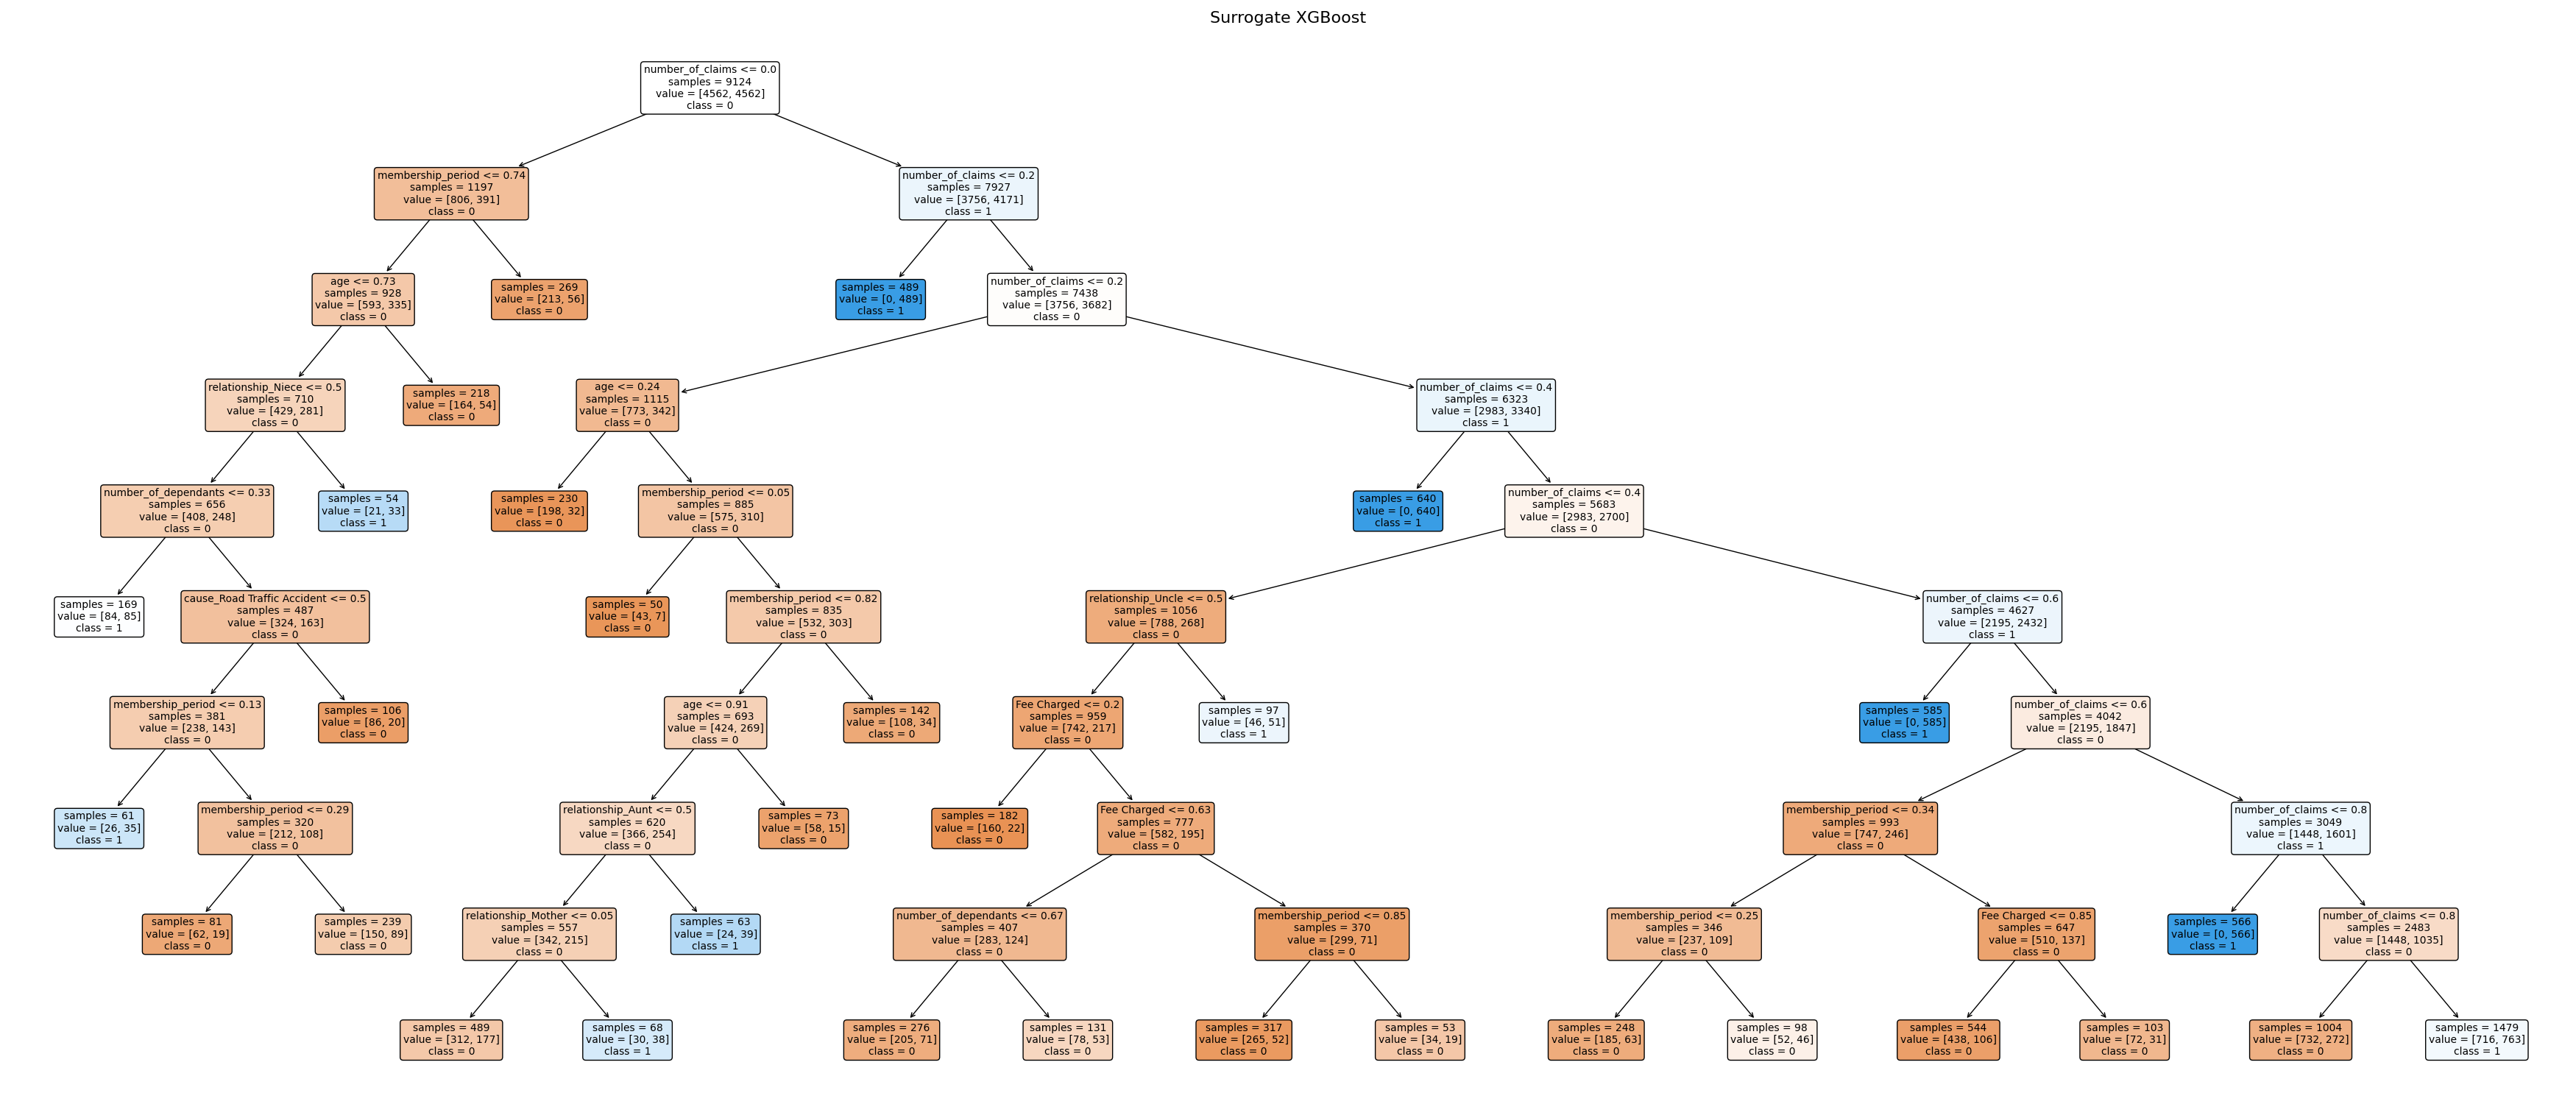


=== FULL RULE SET  ===

|-- number_of_claims <= 0.0002
|  |-- membership_period <= 0.7425
|  |  |-- age <= 0.7266
|  |  |  |-- relationship_Niece <= 0.5000
|  |  |  |  |-- number_of_dependants <= 0.3297
|  |  |  |  |  |-- class: 1
|  |  |  |  |-- number_of_dependants >  0.3297
|  |  |  |  |  |-- cause_Road Traffic Accident <= 0.5000
|  |  |  |  |  |  |-- membership_period <= 0.1339
|  |  |  |  |  |  |  |-- class: 1
|  |  |  |  |  |  |-- membership_period >  0.1339
|  |  |  |  |  |  |  |-- membership_period <= 0.2875
|  |  |  |  |  |  |  |  |-- class: 0
|  |  |  |  |  |  |  |-- membership_period >  0.2875
|  |  |  |  |  |  |  |  |-- class: 0
|  |  |  |  |  |-- cause_Road Traffic Accident >  0.5000
|  |  |  |  |  |  |-- class: 0
|  |  |  |-- relationship_Niece >  0.5000
|  |  |  |  |-- class: 1
|  |  |-- age >  0.7266
|  |  |  |-- class: 0
|  |-- membership_period >  0.7425
|  |  |-- class: 0
|-- number_of_claims >  0.0002
|  |-- number_of_claims <= 0.1999
|  |  |-- class: 1
|  |-- numb

In [ ]:
# Menampilkan Tree dan Full Rule Set Surrogate XGBoost

import joblib
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

# 1) Muat pipeline & ambil model terbaik
pipeline      = joblib.load(saved_path_sxgb7)
sxgb_pipeline   = pipeline.named_steps['grid_search'].best_estimator_
if hasattr(sxgb_pipeline, 'named_steps'):
    sxgb = sxgb_pipeline.named_steps['model']
else:
    sxgb = sxgb_pipeline

# 2) Ambil dan bersihkan nama fitur
raw_names = pipeline.named_steps['preprocessing'].get_feature_names_out()
feature_names = [n.split('__',1)[-1] for n in raw_names]

# 3) Visualisasi full‐depth tree
plt.figure(figsize=(35, 15))
plot_tree(
    sxgb,
    feature_names=feature_names,
    class_names=[str(c) for c in sxgb.classes_],
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=None,     # tampilkan semua level
    label='all',        # tampilkan split + samples + value + class di leaf
    impurity=False,     # hilangkan impurity
    proportion=False,   # tampilkan counts (samples), bukan proporsi
    precision=2         # presisi angka threshold
)
plt.title("Surrogate XGBoost", fontsize=16, pad=12)
plt.tight_layout()
plt.savefig("sxgb7_tree.png", dpi=300, bbox_inches="tight")
plt.show()

# 4) Cetak aturan lengkap tanpa weights
rules = export_text(
    sxgb,
    feature_names=feature_names,
    show_weights=False,  # hilangkan counts di rules
    spacing=2,
    decimals=4
)
print("\n=== FULL RULE SET  ===\n")
print(rules)



### Statistical Performances

In [ ]:
# Statistik Performa Surrogate XGBoost

# prediksi langsung pake pipeline:
y_pred = loaded_pipeline_sxgb7.predict(x_test)
y_prob = loaded_pipeline_sxgb7.predict_proba(x_test)[:, 1]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1132
           1       0.19      0.23      0.21       268

    accuracy                           0.67      1400
   macro avg       0.50      0.50      0.50      1400
weighted avg       0.69      0.67      0.68      1400



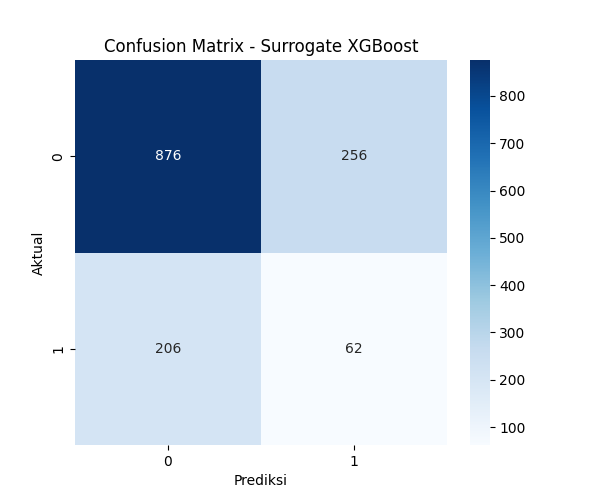

In [ ]:
# Confustion Matrix Surrogate XGBoost

# Predict langsung pakai pipeline
y_pred = loaded_pipeline_sxgb7.predict(x_test)

# 3. Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Surrogate XGBoost")
plt.show()

In [ ]:
# Metrik ROC AUC, Sensitivity & Specificity Surrogate XGBoost

# Load pipeline, pisahkan antara preprocessor & model
pipeline    = joblib.load(saved_path_sxgb7)
preprocessor = pipeline.named_steps['preprocessing']
sxgb         = pipeline.named_steps['grid_search'].best_estimator_

# Ubah x_test menjadi fitur numerik saja
X_test_enc = preprocessor.transform(x_test)

# Prediksi
y_prob = sxgb.predict_proba(X_test_enc)[:, 1]
y_pred = sxgb.predict(X_test_enc)

# Hitung metrik
roc_auc = roc_auc_score(y_test, y_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"ROC AUC Score : {roc_auc:.4f}")
print(f"Sensitivity   : {sensitivity:.4f}")
print(f"Specificity   : {specificity:.4f}")


ROC AUC Score : 0.5149
Sensitivity   : 0.2313
Specificity   : 0.7739


<Figure size 800x600 with 0 Axes>

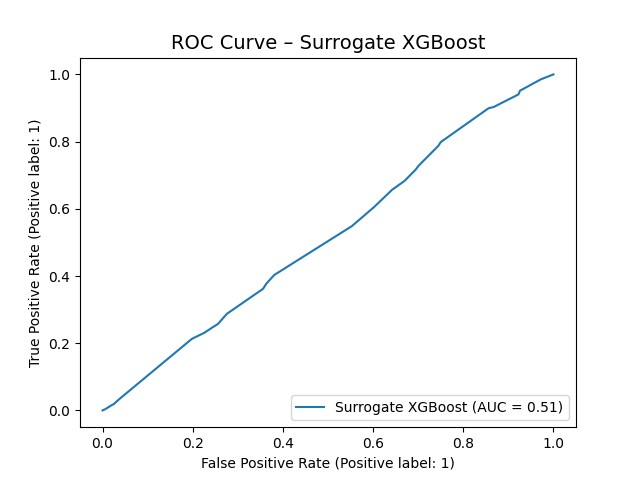

In [ ]:
# ROC Curve Surrogate XGBoost

# Ambil preprocessing step dan best model dari GridSearchCV
preproc      = loaded_pipeline_sxgb7.named_steps['preprocessing']
grid_search  = loaded_pipeline_sxgb7.named_steps['grid_search']
best_model   = grid_search.best_estimator_

# Bangun pipeline inference (tanpa SMOTE)
infer = Pipeline([
    ('preprocessing', preproc),
    ('model',          best_model)
])

# Hitung probabilitas positif
y_prob = infer.predict_proba(x_test)[:, 1]

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(
    y_test,
    y_prob,
    name="Surrogate XGBoost",
    pos_label=1
)
plt.title("ROC Curve – Surrogate XGBoost", fontsize=14)
plt.show()

In [ ]:
# Iterasi Simulasi 10x Surrogate XGBoost

# Muat kembali pipeline GridSearch (yang berisi 'grid_search' step) —
# Misalnya Anda menyimpannya sebagai 'grid_pipeline':
import joblib
grid_pipeline = joblib.load(saved_path_sxgb7)              # pipeline asli
grid_search   = grid_pipeline.named_steps['grid_search']
best_params   = grid_search.best_params_              # ← ambil BEST PARAM sebelum override

# Siapkan list untuk mengumpulkan metrik —
roc_auc_list     = []
specificity_list = []
sensitivity_list = []

# Loop 10 kali dengan pipeline fresh setiap iterasi —
for i in range(1, 11):
    # a) Buat ulang DecisionTreeClassifier pakai best_params
    model_sxgb = DecisionTreeClassifier(criterion='entropy', **best_params)
    pipeline = ImbPipeline([
        ('preprocessing', preprocessing),           # gunakan pipeline preprocessing Anda
        ('oversampling', SMOTE(random_state=1)),
        ('model',          model_sxgb)
    ])
    
    # b) Fit di training
    pipeline.fit(x_train, y_surr)
    
    # c) Predict & prob di test
    y_pred = pipeline.predict(x_test)
    y_prob = pipeline.predict_proba(x_test)[:, 1]
    
    # d) Hitung ROC-AUC
    roc = roc_auc_score(y_test, y_prob)
    roc_auc_list.append(roc)
    
    # e) Hitung specificity & sensitivity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spec = tn / (tn + fp) if (tn + fp) else 0
    sens = tp / (tp + fn) if (tp + fn) else 0
    specificity_list.append(spec)
    sensitivity_list.append(sens)
    
    # f) Tampilkan hasil iterasi
    print(f"Iteration {i:2d}  —  ROC AUC: {roc:.4f},  Spec: {spec:.4f},  Sens: {sens:.4f}")

# Rata-rata dan Std Deviasi —
roc_mean  = np.mean(roc_auc_list)
roc_std   = np.std(roc_auc_list, ddof=1)
spec_mean = np.mean(specificity_list)
spec_std  = np.std(specificity_list, ddof=1)
sens_mean = np.mean(sensitivity_list)
sens_std  = np.std(sensitivity_list, ddof=1)

print("\n" + "—"*50)
print("Rata-rata ± Std.Dev (10 iterasi):")
print(f"ROC AUC     : {roc_mean:.4f} ± {roc_std:.4f}")
print(f"Specificity : {spec_mean:.4f} ± {spec_std:.4f}")
print(f"Sensitivity : {sens_mean:.4f} ± {sens_std:.4f}")


Iteration  1  —  ROC AUC: 0.5149,  Spec: 0.7739,  Sens: 0.2313
Iteration  2  —  ROC AUC: 0.5149,  Spec: 0.7739,  Sens: 0.2313
Iteration  3  —  ROC AUC: 0.5149,  Spec: 0.7739,  Sens: 0.2313
Iteration  4  —  ROC AUC: 0.5149,  Spec: 0.7739,  Sens: 0.2313
Iteration  5  —  ROC AUC: 0.5149,  Spec: 0.7739,  Sens: 0.2313
Iteration  6  —  ROC AUC: 0.5149,  Spec: 0.7739,  Sens: 0.2313
Iteration  7  —  ROC AUC: 0.5149,  Spec: 0.7739,  Sens: 0.2313
Iteration  8  —  ROC AUC: 0.5149,  Spec: 0.7739,  Sens: 0.2313
Iteration  9  —  ROC AUC: 0.5149,  Spec: 0.7739,  Sens: 0.2313
Iteration 10  —  ROC AUC: 0.5149,  Spec: 0.7739,  Sens: 0.2313

——————————————————————————————————————————————————
Rata-rata ± Std.Dev (10 iterasi):
ROC AUC     : 0.5149 ± 0.0000
Specificity : 0.7739 ± 0.0000
Sensitivity : 0.2313 ± 0.0000


## XGBOOST DEPTH 2

### Model

In [ ]:
# Training Model XGBoost Depth 2

from piml.models.xgb2 import XGB2Classifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline  # Corrected import statement
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.preprocessing import FunctionTransformer


# Define the parameter grid for GridSearchCV
param_xgb2 = {'eta': [0.01, 0.05, 0.1, 0.15, 0.2],
              'gamma': [0, 0.1, 1, 3, 5],
              'reg_lambda': [0, 0.1, 0.2, 1, 5]}

# Create the XGB2Classifier model
xgb2_model = XGB2Classifier(n_estimators=250, tree_method="hist")

# Setup the GridSearchCV
xgb2_grid = GridSearchCV(estimator=xgb2_model,
                        param_grid=param_xgb2,
                        cv=5,
                        scoring='roc_auc',
                        n_jobs=-1)

# Create a pipeline with preprocessing, oversampling, and grid search
xgb2_pipeline = ImbPipeline([
    ('preprocessing', preprocessing),
    ('oversampling', SMOTE(random_state=1)),
    ('dense', FunctionTransformer(lambda x: x.toarray() if hasattr(x, "toarray") else x, validate=False)),
    ('grid_search', xgb2_grid)
])

# Fit the pipeline
xgb2_pipeline.fit(x_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical',
                                                  Pipeline(steps=[('Scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'Fee Charged',
                                                   'membership_period',
                                                   'number_of_claims',
                                                   'number_of_dependants']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'relationship',
                                                   'cause'])])),
                ('oversampling', SMOTE(random_state=1)),
                ('dense',
                 FunctionTransformer(func=<function <lambda> at 0x000002C24A8B3F40>)),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=XGB2Classifier(n_estimators=250,
                                                       tree_method='hist'),
                              n_jobs=-1,
                              param_grid={'eta': [0.01, 0.05, 0.1, 0.15, 0.2],
                                          'gamma': [0, 0.1, 1, 3, 5],
                                          'reg_lambda': [0, 0.1, 0.2, 1, 5]},
                              scoring='roc_auc'))])

**Menyimpan Model**

In [ ]:
# Menyimpan Model XGBoost Depth 2

import os
import joblib
import dill
from datetime import datetime

def save_full_pipeline(pipeline, model_name="xgb2_full_pipeline", models_dir="xgb2_models", use_dill=True):
    """
    Simpan seluruh pipeline (preprocessing, oversampling, grid_search/model)
    sebagai satu file .pkl atau .dill yang bisa langsung di-load kembali.
    Jika use_dill=True, akan pakai dill.dump() untuk menghindari PicklingError.
    """
    os.makedirs(models_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    ext = "dill" if use_dill else "pkl"
    filename = f"{models_dir}/{model_name}_{timestamp}.{ext}"
    
    if use_dill:
        # Simpan dengan dill
        with open(filename, "wb") as f:
            dill.dump(pipeline, f)
    else:
        # Coba simpan dengan joblib seperti biasa
        joblib.dump(pipeline, filename)
    
    print(f"✅ Full pipeline saved to: {filename}")
    return filename

# Contoh pemakaian:
# setelah kamu .fit(xgb2_pipeline, x_train, y_train):
saved_path_xgb2 = save_full_pipeline(xgb2_pipeline,
                                     model_name="xgb2_gridsearch_full",
                                     models_dir="xgb2_models",
                                     use_dill=True)


✅ Full pipeline saved to: xgb2_models/xgb2_gridsearch_full_20250523_035039.dill


In [ ]:
# Menampilkan hyperparameter terbaik XGBoost Depth 2

import dill

# 1) Muat file .dill
with open(saved_path_xgb2, "rb") as f:
    loaded_pipeline_xgb2 = dill.load(f)

# 2) Akses GridSearchCV di dalam pipeline
gs = loaded_pipeline_xgb2.named_steps['grid_search']

# 3) Ambil dan print best hyperparameters
best_params = gs.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'eta': 0.2, 'gamma': 0.1, 'reg_lambda': 0.1}


In [296]:
# Ambil hasil CV dari GridSearchCV
cv_results = loaded_pipeline_xgb2.named_steps['grid_search'].cv_results_

# 3) Tampilkan sebagai DataFrame dan sortir berdasarkan rank_test_score
pd.DataFrame(cv_results).sort_values("rank_test_score", ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta,param_gamma,param_reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
106,0.707859,0.130514,0.021399,0.005852,0.2,0.1,0.1,"{'eta': 0.2, 'gamma': 0.1, 'reg_lambda': 0.1}",0.536729,0.859404,0.956940,0.971130,0.967485,0.858337,0.166007,1
84,0.955755,0.084536,0.040998,0.009653,0.15,0.1,5,"{'eta': 0.15, 'gamma': 0.1, 'reg_lambda': 5}",0.533111,0.860370,0.960192,0.970646,0.966996,0.858263,0.167673,2
89,0.565717,0.075050,0.015599,0.001496,0.15,1,5,"{'eta': 0.15, 'gamma': 1, 'reg_lambda': 5}",0.533784,0.861546,0.960326,0.966251,0.966928,0.857767,0.166843,3
64,0.569253,0.041018,0.019401,0.001497,0.1,1,5,"{'eta': 0.1, 'gamma': 1, 'reg_lambda': 5}",0.534675,0.859326,0.960238,0.967187,0.967029,0.857691,0.166615,4
109,0.708966,0.169449,0.018600,0.004316,0.2,0.1,5,"{'eta': 0.2, 'gamma': 0.1, 'reg_lambda': 5}",0.533757,0.859006,0.960222,0.969341,0.965785,0.857622,0.167092,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.744478,0.120940,0.034239,0.007807,0.01,0.1,5,"{'eta': 0.01, 'gamma': 0.1, 'reg_lambda': 5}",0.515897,0.816873,0.930273,0.929698,0.930600,0.824668,0.160502,121
14,0.625334,0.042611,0.019448,0.002411,0.01,1,5,"{'eta': 0.01, 'gamma': 1, 'reg_lambda': 5}",0.515897,0.816873,0.930273,0.929698,0.930600,0.824668,0.160502,121
4,0.872671,0.236906,0.025402,0.011909,0.01,0,5,"{'eta': 0.01, 'gamma': 0, 'reg_lambda': 5}",0.515897,0.816873,0.930273,0.929698,0.930600,0.824668,0.160502,121
19,0.534401,0.024410,0.016199,0.001469,0.01,3,5,"{'eta': 0.01, 'gamma': 3, 'reg_lambda': 5}",0.515897,0.816873,0.930273,0.929698,0.930600,0.824668,0.160502,121


### Statistical Performances

In [ ]:
# Statistik Performa XGBoost Depth 2

# prediksi langsung pake pipeline:
y_pred = loaded_pipeline_xgb2.predict(x_test)
y_prob = loaded_pipeline_xgb2.predict_proba(x_test)[:, 1]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1132
           1       0.00      0.00      0.00       268

    accuracy                           0.81      1400
   macro avg       0.40      0.50      0.45      1400
weighted avg       0.65      0.81      0.72      1400



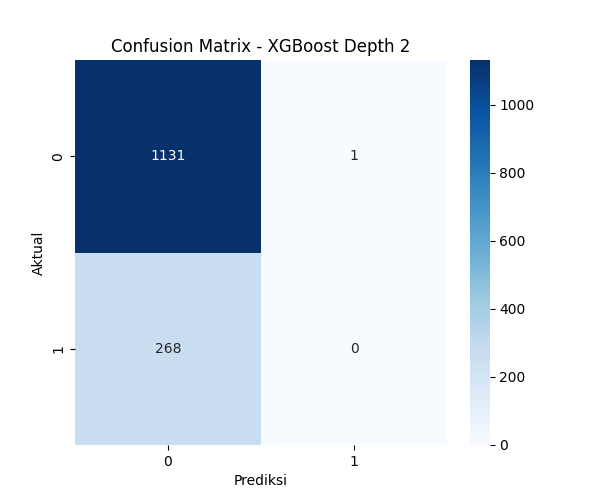

In [ ]:
# Confusion Matrix XGBoost Depth 2

# Predict langsung pakai pipeline
y_pred = loaded_pipeline_xgb2.predict(x_test)

# 3. Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - XGBoost Depth 2")
plt.show()

In [ ]:
# Metrik ROC AUC, Sensitivity & Specificity

# Load pipeline, pisahkan antara preprocessor & model
pipeline    = loaded_pipeline_xgb2
preprocessor = pipeline.named_steps['preprocessing']
xgb2           = pipeline.named_steps['grid_search'].best_estimator_

# Ubah x_test menjadi fitur numerik saja
X_test_enc = preprocessor.transform(x_test)

# Prediksi
y_prob = xgb2.predict_proba(X_test_enc)[:, 1]
y_pred = xgb2.predict(X_test_enc)

# Hitung metrik
roc_auc = roc_auc_score(y_test, y_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"ROC AUC Score : {roc_auc:.4f}")
print(f"Sensitivity   : {sensitivity:.4f}")
print(f"Specificity   : {specificity:.4f}")


ROC AUC Score : 0.4898
Sensitivity   : 0.0000
Specificity   : 0.9991


<Figure size 800x600 with 0 Axes>

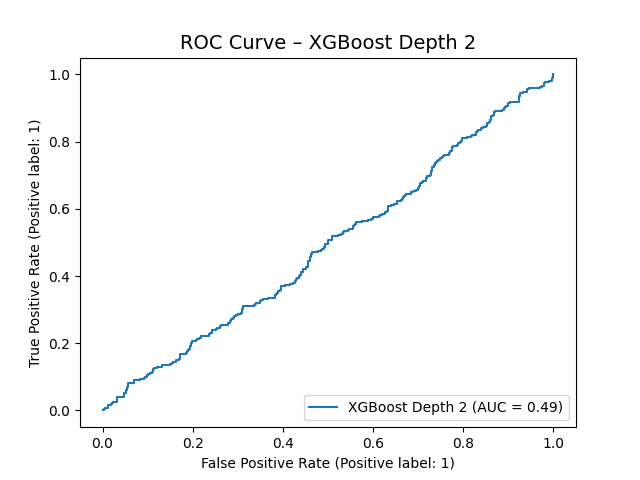

In [ ]:
# ROC Curve XGBoost Depth 2

# Ambil preprocessing step dan best model dari GridSearchCV
preproc      = loaded_pipeline_xgb2.named_steps['preprocessing']
grid_search  = loaded_pipeline_xgb2.named_steps['grid_search']
best_model   = grid_search.best_estimator_

# Bangun pipeline inference (tanpa SMOTE)
infer = Pipeline([
    ('preprocessing', preproc),
    ('model',          best_model)
])

# Hitung probabilitas positif
y_prob = infer.predict_proba(x_test)[:, 1]

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(
    y_test,
    y_prob,
    name="XGBoost Depth 2",
    pos_label=1
)
plt.title("ROC Curve – XGBoost Depth 2", fontsize=14)
plt.show()

In [ ]:
# Iterasi Simulasi 10x XGBoost Depth 2

# Muat kembali pipeline GridSearch (yang berisi 'grid_search' step) —
# Misalnya Anda menyimpannya sebagai 'grid_pipeline':

grid_pipeline = loaded_pipeline_xgb2              # pipeline asli
grid_search   = grid_pipeline.named_steps['grid_search']
best_params   = grid_search.best_params_              # ← ambil BEST PARAM sebelum override

# Siapkan list untuk mengumpulkan metrik —
roc_auc_list     = []
specificity_list = []
sensitivity_list = []

# Loop 10 kali dengan pipeline fresh setiap iterasi —
for i in range(1, 11):
    # a) Buat ulang XGB2Classifier pakai best_params
    model_xgb2 = XGB2Classifier(n_estimators=250, tree_method="hist", **best_params)
    pipeline = ImbPipeline([
        ('preprocessing', preprocessing),           # gunakan pipeline preprocessing Anda
        ('oversampling',   SMOTE(random_state=1)),  # SMOTE hanya di training
        ('model',          model_xgb2)
    ])
    
    # b) Fit di training
    pipeline.fit(x_train, y_train)
    
    # c) Predict & prob di test
    y_pred = pipeline.predict(x_test)
    y_prob = pipeline.predict_proba(x_test)[:, 1]
    
    # d) Hitung ROC-AUC
    roc = roc_auc_score(y_test, y_prob)
    roc_auc_list.append(roc)
    
    # e) Hitung specificity & sensitivity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spec = tn / (tn + fp) if (tn + fp) else 0
    sens = tp / (tp + fn) if (tp + fn) else 0
    specificity_list.append(spec)
    sensitivity_list.append(sens)
    
    # f) Tampilkan hasil iterasi
    print(f"Iteration {i:2d}  —  ROC AUC: {roc:.4f},  Spec: {spec:.4f},  Sens: {sens:.4f}")

# Rata-rata dan Std Deviasi —
roc_mean  = np.mean(roc_auc_list)
roc_std   = np.std(roc_auc_list, ddof=1)
spec_mean = np.mean(specificity_list)
spec_std  = np.std(specificity_list, ddof=1)
sens_mean = np.mean(sensitivity_list)
sens_std  = np.std(sensitivity_list, ddof=1)

print("\n" + "—"*50)
print("Rata-rata ± Std.Dev (10 iterasi):")
print(f"ROC AUC     : {roc_mean:.4f} ± {roc_std:.4f}")
print(f"Specificity : {spec_mean:.4f} ± {spec_std:.4f}")
print(f"Sensitivity : {sens_mean:.4f} ± {sens_std:.4f}")


Iteration  1  —  ROC AUC: 0.4898,  Spec: 0.9991,  Sens: 0.0000
Iteration  2  —  ROC AUC: 0.4898,  Spec: 0.9991,  Sens: 0.0000
Iteration  3  —  ROC AUC: 0.4898,  Spec: 0.9991,  Sens: 0.0000
Iteration  4  —  ROC AUC: 0.4898,  Spec: 0.9991,  Sens: 0.0000
Iteration  5  —  ROC AUC: 0.4898,  Spec: 0.9991,  Sens: 0.0000
Iteration  6  —  ROC AUC: 0.4898,  Spec: 0.9991,  Sens: 0.0000
Iteration  7  —  ROC AUC: 0.4898,  Spec: 0.9991,  Sens: 0.0000
Iteration  8  —  ROC AUC: 0.4898,  Spec: 0.9991,  Sens: 0.0000
Iteration  9  —  ROC AUC: 0.4898,  Spec: 0.9991,  Sens: 0.0000
Iteration 10  —  ROC AUC: 0.4898,  Spec: 0.9991,  Sens: 0.0000

——————————————————————————————————————————————————
Rata-rata ± Std.Dev (10 iterasi):
ROC AUC     : 0.4898 ± 0.0000
Specificity : 0.9991 ± 0.0000
Sensitivity : 0.0000 ± 0.0000


In [37]:
# Pastikan y_train hanya berisi 0/1 dan ada kedua kelas
print("Unique values in y_train:", y_train.unique())
print("Value counts:\n", y_train.value_counts())
# Hitung proporsi positif
p = y_train.mean()
print("Prevalensi positif (proporsi 1):", p)


Unique values in y_train: ['0' '1']
Value counts:
 0    4489
1    1111
Name: label, dtype: int64
Prevalensi positif (proporsi 1): inf


Value counts y_train:
 0    4489
1    1111
Name: label, dtype: int64
Prevalensi positif (proporsi label=1): 0.5
Log-odds prevalensi (clip): 0.0
Shape X_pre (data asli setelah preprocessing): (5600, 24)
Intercept log-odds (mu) di-set dari rata-rata logit model (data asli): -1.1168828
Memilih top-10 fitur indices (berdasarkan weight): [3, 0, 2, 4, 1, 15, 5, 23, 12, 16] -> ['number_of_claims', 'age', 'membership_period', 'number_of_dependants', 'Fee Charged', 'relationship_Nepfew', 'gender_female', 'cause_Road Traffic Accident', 'relationship_Grandmother', 'relationship_Niece']
Final used features setelah filter (memiliki thresholds): [3, 0, 2, 4, 1, 15, 5, 23, 12, 16] -> ['number_of_claims', 'age', 'membership_period', 'number_of_dependants', 'Fee Charged', 'relationship_Nepfew', 'gender_female', 'cause_Road Traffic Accident', 'relationship_Grandmother', 'relationship_Niece']
=== Debug: h_raw sebelum purify ===
  Fitur 3 (number_of_claims), bins=14, sample h_raw[:5]=[0.         2.4718814

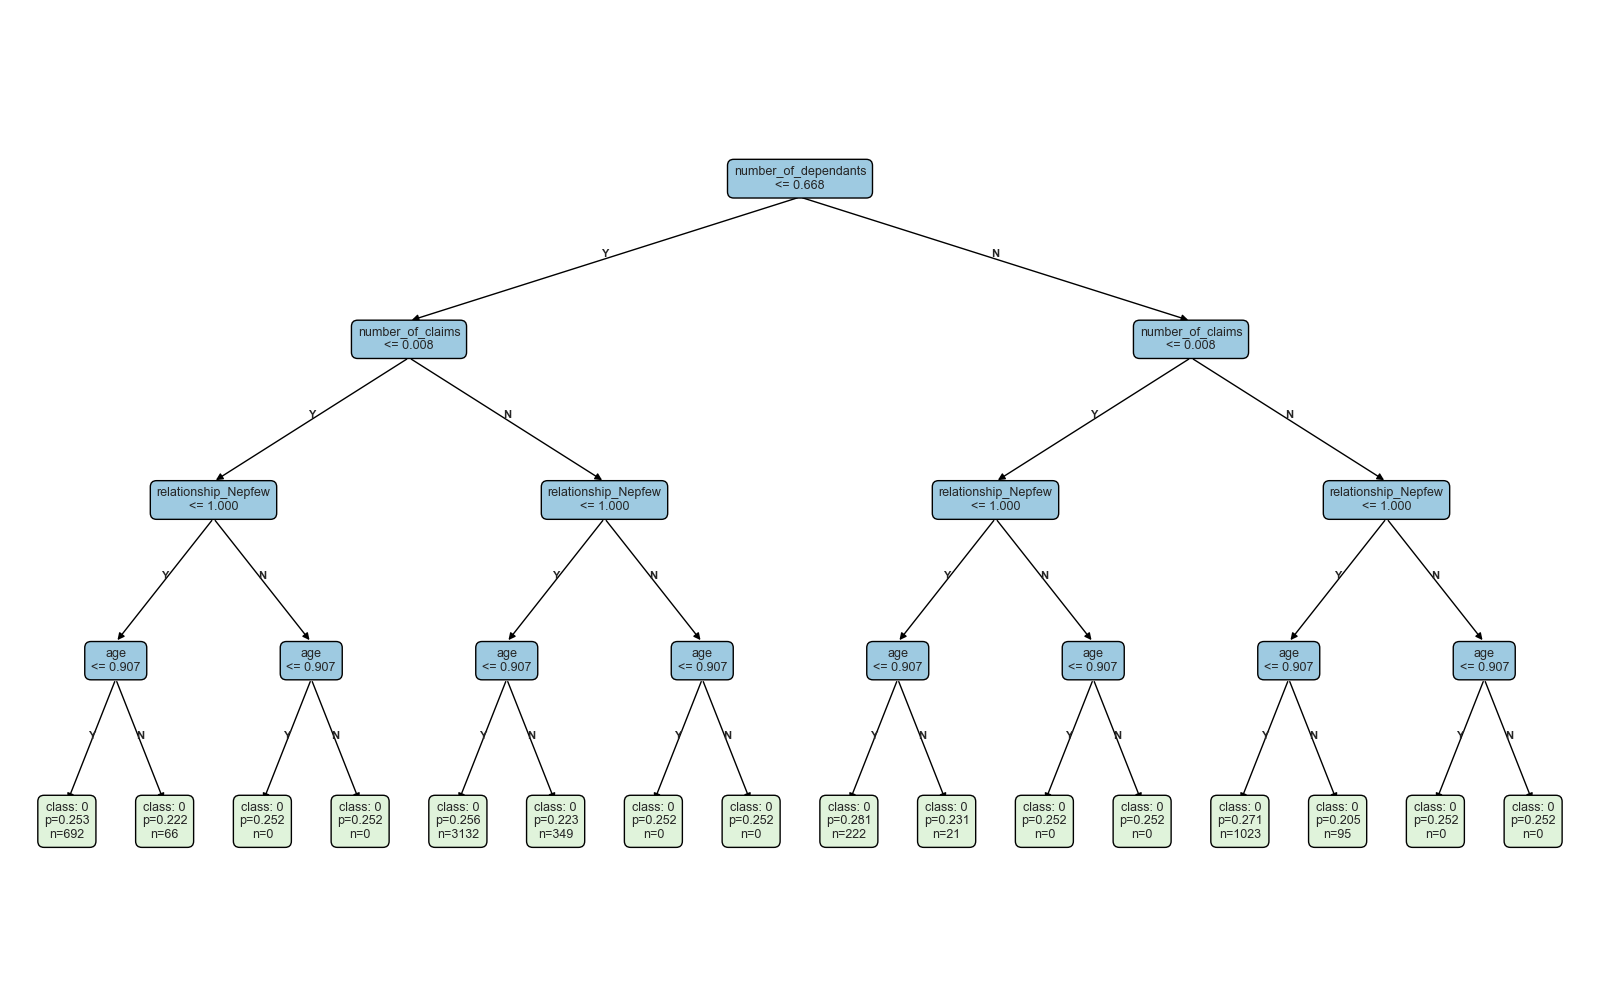

In [ ]:
# Menampilkan Pohon Tunggal GAMI dan Full Rule Set dari XGBoost Depth 2

import dill
import json
import numpy as np
import random
from itertools import product, combinations
from math import log, exp
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import pandas as pd

# ========================================
#  PASTIKAN: x_train, y_train telah didefinisikan
#  x_train: pd.DataFrame fitur asli sebelum SMOTE, kolom sesuai pipeline preprocessing
#  y_train: pd.Series label asli (0/1) atau string '0'/'1'
# ========================================
try:
    x_train
    y_train
except NameError:
    raise RuntimeError(
        "Variabel x_train dan y_train belum didefinisikan. "
        "Silakan siapkan DataFrame x_train dan Series y_train sesuai pipeline Anda."
    )

# ---------------------------------------------------
# 0) Konversi y_train menjadi numeric (0/1) jika perlu
# ---------------------------------------------------
# Jika y_train bertipe object/string, convert ke int
if not np.issubdtype(y_train.dtype, np.number):
    try:
        y_train = y_train.astype(int)
    except Exception:
        # jika misalnya '0'/'1' string, to_numeric:
        y_train = pd.to_numeric(y_train, errors='raise').astype(int)

# Pastikan hanya ada 0 dan 1
unique = np.unique(y_train)
if not set(unique).issubset({0,1}):
    raise RuntimeError(f"y_train mengandung nilai selain 0/1: {unique}")

# Hitung distribusi dan proporsi
counts = y_train.value_counts().sort_index()
print("Value counts y_train:\n", counts)
prevalence = 0.5
print("Prevalensi positif (proporsi label=1):", prevalence)
# Clip sebelum log-odds jika diperlukan
eps = 1e-6
p_clip = np.clip(prevalence, eps, 1-eps)
logodds_prev = np.log(p_clip / (1-p_clip))
print("Log-odds prevalensi (clip):", logodds_prev)

# ----------------------------------------
# 1) Load pipeline + XGB2Classifier terlatih
# ----------------------------------------
dill_path = "xgb2_models/xgb2_gridsearch_full_20250523_035039.dill"  # sesuaikan path jika perlu
with open(dill_path, "rb") as f:
    pipeline = dill.load(f)

preproc = pipeline.named_steps.get("preprocessing")
if preproc is None:
    raise RuntimeError("Pipeline tidak memiliki named_steps['preprocessing']")
gs = pipeline.named_steps.get("grid_search") or pipeline.named_steps.get("model")
if gs is None:
    raise RuntimeError("Pipeline tidak memiliki named_steps['grid_search'] atau ['model']")
if hasattr(gs, "best_estimator_"):
    est = gs.best_estimator_
else:
    est = gs
xgb2 = est
if hasattr(xgb2, "estimator_"):
    xgb2 = xgb2.estimator_
try:
    booster = xgb2.get_booster()
except Exception as e:
    raise RuntimeError(f"Gagal ambil booster dari model: {e}")

# ----------------------------------------
# 2) Transform x_train dan hitung probabilitas asli
# ----------------------------------------
X_pre = preproc.transform(x_train)
if hasattr(X_pre, "toarray"):
    X_pre = X_pre.toarray()
print("Shape X_pre (data asli setelah preprocessing):", X_pre.shape)

# Prediksi probabilitas kelas 1
proba = xgb2.predict_proba(X_pre)[:, 1]
# Hindari 0 atau 1 persis
proba = np.clip(proba, eps, 1 - eps)

# Rata-rata logit untuk intercept mu
logit = np.log(proba / (1 - proba))
mu = logit.mean()
print("Intercept log-odds (mu) di-set dari rata-rata logit model (data asli):", mu)

# ----------------------------------------
# 3) Feature names pasca-preprocessing
# ----------------------------------------
feat_out = preproc.get_feature_names_out()
def clean_feat(feat: str) -> str:
    return feat.split("__",1)[1] if "__" in feat else feat

# ----------------------------------------
# 4) Pilih top_k fitur untuk GAMI
# ----------------------------------------
importance_type = "weight"  # bisa "gain" atau "weight"
score_imp = booster.get_score(importance_type=importance_type)
feat_imp = []
for k, v in score_imp.items():
    if k.startswith("f") and k[1:].isdigit():
        idx = int(k[1:])
        if idx < len(feat_out):
            feat_imp.append((idx, clean_feat(feat_out[idx]), v))
feat_imp_sorted = sorted(feat_imp, key=lambda x: x[2], reverse=True)

# Jika banyak bin, Anda bisa memeriksa bin count tiap fitur:
# Misal:
# bins_1d awal dihitung kemudian:
# feat_bins = [(idx, name, len(bins_1d[idx])+1) for idx,name,imp in feat_imp_sorted if idx in bins_1d]
# print("Fitur penting & bin count:", feat_bins)
# Lalu pilih subset dengan bin_count terbatas, misal <=20.

top_k = 10  # sesuaikan jika perlu. Jika runtime terlalu lama, turunkan top_k ke 5 atau 6.
used = [idx for idx, name, imp in feat_imp_sorted[:top_k]]
print(f"Memilih top-{top_k} fitur indices (berdasarkan {importance_type}):", used,
      "->", [clean_feat(feat_out[i]) for i in used])
if not used:
    raise RuntimeError("Tidak ada fitur terpilih; periksa model atau data.")

# ----------------------------------------
# 5) Kumpulkan thresholds (bins_1d) hanya untuk fitur di 'used'
# ----------------------------------------
trees_json = booster.get_dump(dump_format="json")
trees = [json.loads(t) for t in trees_json]

bins_1d = {i: set() for i in used}
def collect_thresholds(node):
    if "leaf" in node:
        return
    split = node.get("split", "")
    if split.startswith("f") and split[1:].isdigit():
        idx = int(split[1:])
        if idx in bins_1d:
            thr = node["split_condition"]
            bins_1d[idx].add(thr)
    for ch in node.get("children", []):
        collect_thresholds(ch)

for tree in trees:
    collect_thresholds(tree)

# Sorted lists; hapus fitur tanpa threshold
for i in list(bins_1d.keys()):
    lst = sorted(bins_1d[i])
    if len(lst) == 0:
        print(f"Fitur index {i} ({clean_feat(feat_out[i])}) tidak punya threshold, dihapus dari used.")
        used.remove(i)
        del bins_1d[i]
    else:
        # Opsional: jika bin count terlalu banyak, lakukan pra-binning quantile:
        # if len(lst) > 20:
        #     # contoh ambil 20 quantile threshold dari distribusi X_pre[:,i]
        #     quantiles = np.linspace(0, 1, 21)[1:-1]
        #     bins_q = np.quantile(X_pre[:, i], quantiles)
        #     bins_1d[i] = sorted(set(bins_q.tolist()))
        # else:
        bins_1d[i] = lst
print("Final used features setelah filter (memiliki thresholds):", used,
      "->", [clean_feat(feat_out[i]) for i in used])
if not used:
    raise RuntimeError("Semua fitur top_k tidak memiliki threshold split; pilih top_k berbeda atau turunkan.")

# ----------------------------------------
# 6) Inisialisasi container raw effects
# ----------------------------------------
h_raw = {i: np.zeros(len(bins_1d[i]) + 1) for i in used}
f_raw = {}
for i, j in combinations(sorted(used), 2):
    a, b = (i, j) if i < j else (j, i)
    f_raw[(a, b)] = np.zeros((len(bins_1d[a]) + 1, len(bins_1d[b]) + 1))

# ----------------------------------------
# 7) Route semua pohon: akumulasi leaf values ke h_raw / f_raw
# ----------------------------------------
def route_tree(node, path):
    if "leaf" in node:
        val = node["leaf"]
        path_used = [p for p in path if p[0] in used]
        last_split = {}
        for feat_idx, op, thr in path_used:
            last_split[feat_idx] = (op, thr)
        if len(last_split) == 1:
            i, (op, thr) = next(iter(last_split.items()))
            bi = np.digitize(thr, bins_1d[i])
            h_raw[i][bi] += val
        elif len(last_split) == 2:
            items = sorted(last_split.items(), key=lambda x: x[0])
            (i1, (_, thr1)), (i2, (_, thr2)) = items
            a, b = (i1, i2) if i1 < i2 else (i2, i1)
            if i1 < i2:
                thr_a, thr_b = thr1, thr2
            else:
                thr_a, thr_b = thr2, thr1
            bi = np.digitize(thr_a, bins_1d[a])
            bj = np.digitize(thr_b, bins_1d[b])
            f_raw[(a, b)][bi, bj] += val
        return
    split = node.get("split", "")
    if split.startswith("f") and split[1:].isdigit():
        idx = int(split[1:])
    else:
        idx = None
    thr = node.get("split_condition", None)
    if idx is not None:
        route_tree(node["children"][0], path + [(idx, "<", thr)])
        route_tree(node["children"][1], path + [(idx, ">=", thr)])
    else:
        for ch in node.get("children", []):
            route_tree(ch, path)

for tree in trees:
    route_tree(tree, [])

# Debug sebelum purify
print("=== Debug: h_raw sebelum purify ===")
for i in used:
    print(f"  Fitur {i} ({clean_feat(feat_out[i])}), bins={len(bins_1d[i])+1}, sample h_raw[:5]={h_raw[i][:5]} ...")
print("=== Debug: f_raw sebelum purify sums ===")
for (i, j), mat in f_raw.items():
    print(f"  Interaksi ({i},{j}), sum={mat.sum():.6f}, shape={mat.shape}")

# ----------------------------------------
# 8) Purifikasi interaksi agar conditional mean = 0
# ----------------------------------------
def purify(mat, h_i, h_j, tol=1e-6, max_iter=10):
    for _ in range(max_iter):
        row_m = mat.mean(axis=1)
        mat -= row_m[:, None]; h_i += row_m
        col_m = mat.mean(axis=0)
        mat -= col_m;     h_j += col_m
        if np.all(np.abs(row_m) < tol) and np.all(np.abs(col_m) < tol):
            break

for (i, j), mat in f_raw.items():
    purify(mat, h_raw[i], h_raw[j])

# ----------------------------------------
# 9) Zero-center main effects
# ----------------------------------------
for i in used:
    mu_i = h_raw[i].mean()
    h_raw[i] -= mu_i

# Debug setelah purify
print("=== Debug: h_raw setelah purify & zero-center ===")
for i in used:
    print(f"  Fitur {i} ({clean_feat(feat_out[i])}), std(h_raw)={np.std(h_raw[i]):.6f}, h_raw[:5]={h_raw[i][:5]} ...")
print("=== Debug: f_raw setelah purify sums ===")
for (i, j), mat in f_raw.items():
    print(f"  Interaksi ({i},{j}), sum={mat.sum():.6f}, shape={mat.shape}")

# ----------------------------------------
# 10) Fungsi compute_V_for_bin_indices
# ----------------------------------------
def compute_V_for_bin_indices(cell, used, h_raw, f_raw, mu):
    v = mu
    for i in used:
        bi = cell[i]
        v += h_raw[i][bi]
    for (i, j), mat in f_raw.items():
        if i in cell and j in cell:
            bi = cell[i]; bj = cell[j]
            v += mat[bi, bj]
    return v

# ----------------------------------------
# 11) Estimasi split stats & find_best_split
# ----------------------------------------
def estimate_group_stats_split(feature_i, t_idx, used, bins_1d, h_raw, f_raw, mu,
                               max_enum=5000, n_samples=1000, random_state=1):
    other_feats = [j for j in used if j != feature_i]
    total_combos = 1
    for j in other_feats:
        total_combos *= (len(bins_1d[j]) + 1)
        if total_combos > max_enum:
            break
    def all_combos_other():
        return product(*[range(len(bins_1d[j])+1) for j in other_feats])
    def process_bin_group(bin_i_values, do_sampling):
        vals = []
        if not do_sampling and total_combos <= max_enum:
            for bi in bin_i_values:
                for combo in all_combos_other():
                    cell = {feature_i: bi}
                    for k, j in enumerate(other_feats):
                        cell[j] = combo[k]
                    vals.append(compute_V_for_bin_indices(cell, used, h_raw, f_raw, mu))
            arr = np.array(vals, dtype=float)
            if arr.size == 0:
                return 0.0, 0.0, 0
            return arr.mean(), arr.var(), arr.size
        else:
            rng = random.Random(random_state)
            vals_s = []
            for _ in range(n_samples):
                bi = rng.choice(bin_i_values)
                cell = {feature_i: bi}
                for j in other_feats:
                    cell[j] = rng.randrange(len(bins_1d[j]) + 1)
                vals_s.append(compute_V_for_bin_indices(cell, used, h_raw, f_raw, mu))
            arr = np.array(vals_s, dtype=float)
            return arr.mean(), arr.var(), arr.size
    max_bin_i = len(bins_1d[feature_i])
    left_bins = list(range(0, t_idx+1))
    right_bins = list(range(t_idx+1, max_bin_i+1))
    do_sampling = total_combos > max_enum
    return process_bin_group(left_bins, do_sampling), process_bin_group(right_bins, do_sampling)

def find_best_split(used, bins_1d, h_raw, f_raw, mu,
                    max_enum=5000, n_samples=1000, random_state=1):
    counts = [len(bins_1d[j]) + 1 for j in used]
    total_parent = 1
    for c in counts:
        total_parent *= c
        if total_parent > max_enum:
            break
    def estimate_parent():
        if total_parent <= max_enum:
            vals = []
            for combo in product(*[range(len(bins_1d[j])+1) for j in used]):
                cell = {j: combo[k] for k,j in enumerate(used)}
                vals.append(compute_V_for_bin_indices(cell, used, h_raw, f_raw, mu))
            arr = np.array(vals, dtype=float)
            return arr.mean(), arr.var(), arr.size
        else:
            rng = random.Random(random_state)
            vals = []
            for _ in range(n_samples):
                combo = [rng.randrange(len(bins_1d[j])+1) for j in used]
                cell = {j: combo[k] for k,j in enumerate(used)}
                vals.append(compute_V_for_bin_indices(cell, used, h_raw, f_raw, mu))
            arr = np.array(vals, dtype=float)
            return arr.mean(), arr.var(), arr.size
    mean_P, var_P, n_P = estimate_parent()

    best_i = None; best_t = None; best_reduction = -np.inf; best_stats = None
    for i in used:
        max_bin_i = len(bins_1d[i])
        for t_idx in range(0, max_bin_i):
            (mean_L, var_L, n_L), (mean_R, var_R, n_R) = estimate_group_stats_split(
                i, t_idx, used, bins_1d, h_raw, f_raw, mu,
                max_enum=max_enum, n_samples=n_samples, random_state=random_state
            )
            total_n = n_L + n_R
            if total_n == 0:
                continue
            within_var = (n_L*var_L + n_R*var_R) / total_n
            reduction = var_P - within_var
            if reduction > best_reduction:
                best_reduction = reduction
                best_i, best_t = i, t_idx
                best_stats = {
                    'mean_parent': mean_P, 'var_parent': var_P, 'n_parent': n_P,
                    'mean_L': mean_L, 'var_L': var_L, 'n_L': n_L,
                    'mean_R': mean_R, 'var_R': var_R, 'n_R': n_R,
                }
    return best_i, best_t, best_reduction, best_stats

# ----------------------------------------
# 12) Kelas node GAMI
# ----------------------------------------
class GamiNode:
    def __init__(self, feature_idx=None, threshold_idx=None, left=None, right=None, value=None):
        self.feature_idx = feature_idx
        self.threshold_idx = threshold_idx
        self.left = left
        self.right = right
        self.value = value

# ----------------------------------------
# 13) Build GAMI-tree (rekursif)
# ----------------------------------------
def build_gami_tree(used, bins_1d, h_raw, f_raw, mu,
                    max_depth=4, min_reduction=1e-4,
                    max_enum=5000, n_samples=1000, random_state=1, depth=0):
    best_i, best_t, best_red, stats = find_best_split(
        used, bins_1d, h_raw, f_raw, mu,
        max_enum=max_enum, n_samples=n_samples, random_state=random_state
    )
    if best_i is None or best_red < min_reduction or depth >= max_depth:
        if stats is not None:
            val = stats['mean_parent']
        else:
            rng = random.Random(random_state + depth)
            if len(used) > 0:
                combo = [rng.randrange(len(bins_1d[j])+1) for j in used]
                cell = {j: combo[k] for k,j in enumerate(used)}
                val = compute_V_for_bin_indices(cell, used, h_raw, f_raw, mu)
            else:
                val = mu
        return GamiNode(value=val)
    node = GamiNode(feature_idx=best_i, threshold_idx=best_t)
    used_child = [j for j in used if j != best_i]
    node.left = build_gami_tree(
        used_child, bins_1d, h_raw, f_raw, mu,
        max_depth=max_depth, min_reduction=min_reduction,
        max_enum=max_enum, n_samples=n_samples, random_state=random_state, depth=depth+1
    )
    node.right = build_gami_tree(
        used_child, bins_1d, h_raw, f_raw, mu,
        max_depth=max_depth, min_reduction=min_reduction,
        max_enum=max_enum, n_samples=n_samples, random_state=random_state, depth=depth+1
    )
    return node

# Build GAMI-tree dengan parameter yang bisa disesuaikan:
# Jika runtime terlalu lama: turunkan top_k, max_depth, max_enum, n_samples, atau nonaktifkan interaksi dengan f_raw={} dsb.
gami_root = build_gami_tree(
    used, bins_1d, h_raw, f_raw, mu,
    max_depth=4,        # misal 3 atau 2 jika terlalu lambat
    min_reduction=1e-4,
    max_enum=1000,      # misal 500 atau 1000
    n_samples=200,      # misal 100-200
    random_state=42
)
print("GAMI-Tree dibangun dengan max_depth=4")

# ----------------------------------------
# 14) Cetak full rules set (data-driven p leaf)
# ----------------------------------------
def print_rules_gami_with_mask(node, bins_1d, feat_out, X_pre, proba, prevalence, mask=None, indent_level=0):
    if mask is None:
        mask = np.ones(X_pre.shape[0], dtype=bool)
    indent = "  " * indent_level
    if node.feature_idx is not None:
        i = node.feature_idx
        thr_val = bins_1d[i][node.threshold_idx]
        feat_name = clean_feat(feat_out[i])
        cond_left = f"{feat_name} <= {thr_val:.4f}"
        print(f"{indent}|-- {cond_left}")
        mask_left = mask & (X_pre[:, i] <= thr_val)
        print_rules_gami_with_mask(node.left, bins_1d, feat_out, X_pre, proba, prevalence, mask_left, indent_level+1)

        cond_right = f"{feat_name} >  {thr_val:.4f}"
        print(f"{indent}|-- {cond_right}")
        mask_right = mask & (X_pre[:, i] > thr_val)
        print_rules_gami_with_mask(node.right, bins_1d, feat_out, X_pre, proba, prevalence, mask_right, indent_level+1)
    else:
        if mask.sum() > 0:
            p_leaf = proba[mask].mean()
        else:
            logodds = node.value
            p_leaf = 1/(1+exp(-logodds))
        cls = 1 if p_leaf > prevalence else 0
        print(f"{indent}|-- class: {cls}    (p={p_leaf:.3f}, n_samples={mask.sum()})")

print("\n=== FULL RULE SET GAMI (data-driven p leaf) (max_depth=4) ===")
print_rules_gami_with_mask(gami_root, bins_1d, feat_out, X_pre, proba, prevalence)

# ----------------------------------------
# 15) Visualisasi pohon GAMI dengan kotak menggunakan bbox di ax.text
# ----------------------------------------
def draw_edge(ax, x_parent, y_parent, x_child, y_child, label=None):
    offset = 0.4
    start = (x_parent, y_parent - offset)
    end   = (x_child,  y_child + offset)
    arrow = FancyArrowPatch(start, end,
                            arrowstyle='-|>', mutation_scale=10,
                            linewidth=1.0, color='black', zorder=0)
    ax.add_patch(arrow)
    if label is not None:
        mx = (start[0] + end[0]) / 2
        my = (start[1] + end[1]) / 2
        ax.text(mx, my + 0.1, label, ha='center', va='center',
                fontsize=8, fontweight='bold', zorder=3)

def plot_gami_tree_rectangular_bbox(gami_root, feat_out, bins_1d, clean_feat_func,
                               X_pre, proba, prevalence,
                               figsize=(14, 8), fontsize=9,
                               vertical_gap=3.5, horizontal_gap=3.5):
    """
    Visualisasi GAMI-tree dengan kotak pada tiap node, ukuran otomatis mengikuti teks
    (menggunakan bbox pada ax.text dengan wrap=True), dan leaf diwarnai berdasarkan p_leaf vs prevalence.
    """
    # 1) Hitung posisi node dengan inorder traversal tanpa default mutable
    def compute_positions(node, depth, x_counter, pos):
        if node is None:
            return
        if node.feature_idx is not None and node.left is not None:
            compute_positions(node.left, depth+1, x_counter, pos)
        x = x_counter[0]
        pos[node] = (x, depth)
        x_counter[0] += 1
        if node.feature_idx is not None and node.right is not None:
            compute_positions(node.right, depth+1, x_counter, pos)

    pos_idx = {}
    compute_positions(gami_root, depth=0, x_counter=[0], pos=pos_idx)
    coords = {}
    for node, (x_idx, depth) in pos_idx.items():
        x = x_idx * horizontal_gap
        y = - depth * vertical_gap
        coords[node] = (x, y)

    fig, ax = plt.subplots(figsize=figsize)
    ax.axis('off')

    # 2) Assign mask per node untuk menghitung p leaf
    node_masks = {}
    def assign_masks(node, mask):
        node_masks[node] = mask
        if node.feature_idx is not None:
            i = node.feature_idx
            thr_val = bins_1d[i][node.threshold_idx]
            mask_left = mask & (X_pre[:, i] <= thr_val)
            mask_right = mask & (X_pre[:, i] > thr_val)
            assign_masks(node.left, mask_left)
            assign_masks(node.right, mask_right)
    mask_root = np.ones(X_pre.shape[0], dtype=bool)
    assign_masks(gami_root, mask_root)

    # 3) Gambar edges terlebih dahulu
    for node, (x, y) in coords.items():
        if node.feature_idx is not None:
            if node.left is not None:
                xc, yc = coords[node.left]
                draw_edge(ax, x, y, xc, yc, label='Y')
            if node.right is not None:
                xc, yc = coords[node.right]
                draw_edge(ax, x, y, xc, yc, label='N')

    # 4) Gambar nodes: gunakan ax.text dengan bbox dan wrap=True
    for node, (x, y) in coords.items():
        if node.feature_idx is None:
            # Leaf: hitung p rata-rata pada subset data
            mask = node_masks[node]
            if mask.sum() > 0:
                p_leaf = proba[mask].mean()
            else:
                logodds = node.value
                p_leaf = 1/(1+np.exp(-logodds))
            cls = 1 if p_leaf > prevalence else 0
            text = f"class: {cls}\np={p_leaf:.3f}\nn={mask.sum()}"
            # Pewarnaan leaf: hijau muda jika <= prevalence, merah jika > prevalence
            face = '#e0f3db' if p_leaf <= prevalence else '#fc8d59'
            ax.text(
                x, y, text,
                ha='center', va='center',
                fontsize=fontsize,
                wrap=True,
                bbox=dict(boxstyle="round,pad=0.5", facecolor=face, edgecolor='black'),
                zorder=2
            )
        else:
            i = node.feature_idx
            thr_val = bins_1d[i][node.threshold_idx]
            feat_name = clean_feat_func(feat_out[i])
            # Jika nama fitur panjang, wrap
            text = f"{feat_name}\n<= {thr_val:.3f}"
            ax.text(
                x, y, text,
                ha='center', va='center',
                fontsize=fontsize,
                wrap=True,
                bbox=dict(boxstyle="round,pad=0.5", facecolor='#9ecae1', edgecolor='black'),
                zorder=2
            )

    # 5) Atur limits agar seluruh pohon tampil
    all_x = [coord[0] for coord in coords.values()]
    all_y = [coord[1] for coord in coords.values()]
    if all_x and all_y:
        margin_x = horizontal_gap
        margin_y = vertical_gap
        ax.set_xlim(min(all_x)-margin_x, max(all_x)+margin_x)
        ax.set_ylim(min(all_y)-margin_y, max(all_y)+margin_y)
    plt.tight_layout()
    plt.show()

# Panggil visualisasi
print("\nMenampilkan visualisasi pohon GAMI (kotak otomatis via bbox, data-driven p leaf):")
plot_gami_tree_rectangular_bbox(
    gami_root,
    feat_out=feat_out,
    bins_1d=bins_1d,
    clean_feat_func=clean_feat,
    X_pre=X_pre,
    proba=proba,
    prevalence=prevalence,
    figsize=(16, 10),
    fontsize=9,
    vertical_gap=3.5,
    horizontal_gap=3.5
)
